<h1 style="text-align: center;">Visual Analytics Project</h1>
<h2 style="text-align: center;">By: Mausmi Sinha & Aman Singh Bhogal</h2>
<h3 style="text-align: center;">Roll No: A241 & A236</h3>
<h3 style="text-align: center;">B.Tech IT Final Year</h3>

### Importing Libraries:

In [1]:
# pip uninstall seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode()
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [4]:
reason = np.unique(df['title'])
UniqueReasonsCount = reason.size
print(UniqueReasonsCount)

124


As you can see above, there are 117 reasons of 911-calls.

In [5]:
DATA = np.zeros((df.shape[0],6),dtype='O')
DATA[:,0] = df['lng'].values
DATA[:,1] = df['lat'].values
DATA[:,4] = df['title'].values
DATA[:,5] = df['twp'].values
for i in range(DATA.shape[0]):
    DATA[i,2] = df['timeStamp'].values[i][:10]
    DATA[i,3] = df['timeStamp'].values[i][10:]
    sp = DATA[i,3].split(':')
    DATA[i,3] = (int(sp[0])*3600 + int(sp[1])*60 + int(sp[2]))/3600

In [6]:
new_data = np.zeros(reason.size,dtype = 'O')
for i in range(reason.size):
    new_data[i] = DATA[np.where(DATA[:,4] == reason[i])]

In [7]:
week = np.array(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [8]:
for i in range(new_data.shape[0]):
    for j in range(new_data[i].shape[0]):
        w = np.array(new_data[i][j,2].split('-')).astype(int)
        new_data[i][j,0] = week[calendar.weekday(w[0],w[1],w[2])]

Number of calls with EMS: ABDOMINAL PAINS 2730


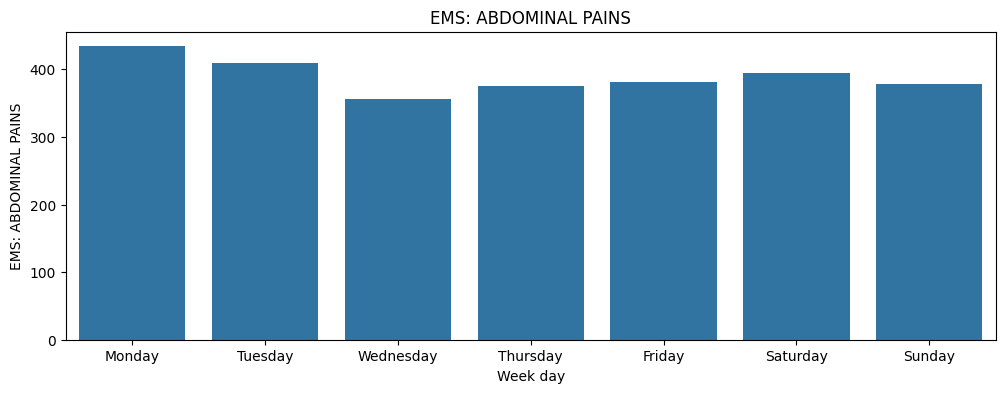

Number of calls with EMS: ALTERED MENTAL STATUS 2740


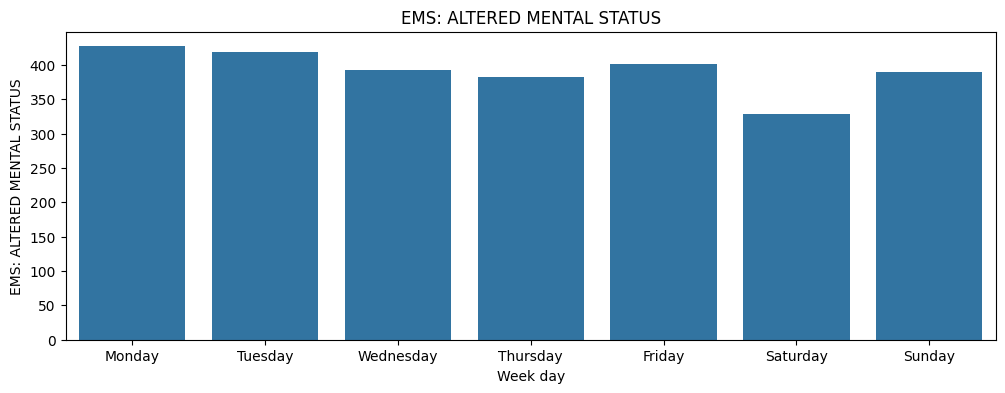

Number of calls with EMS: CARDIAC EMERGENCY 9483


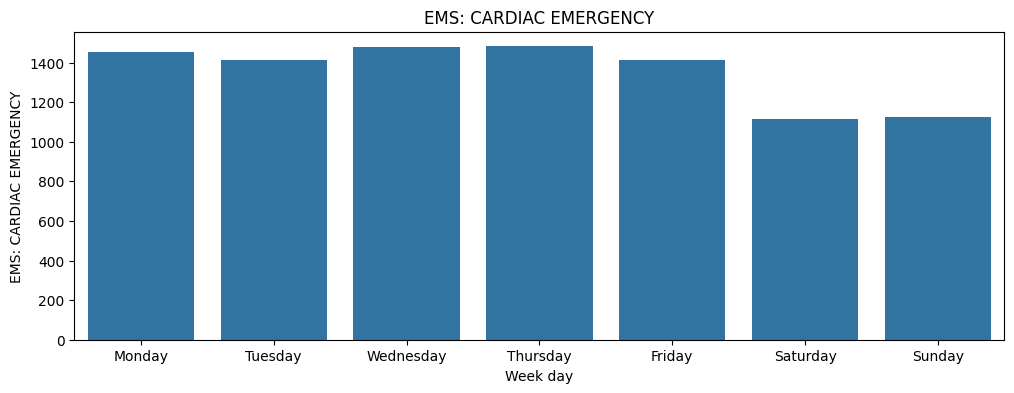

Number of calls with EMS: CVA/STROKE 2350


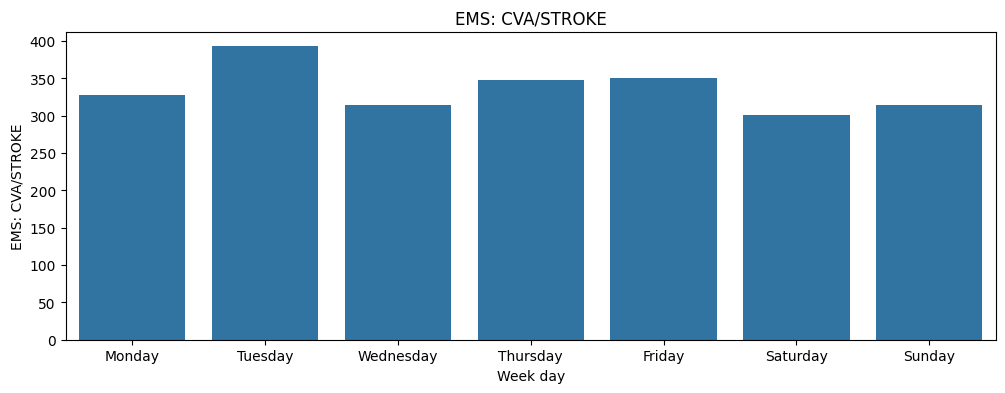

Number of calls with EMS: FALL VICTIM 9452


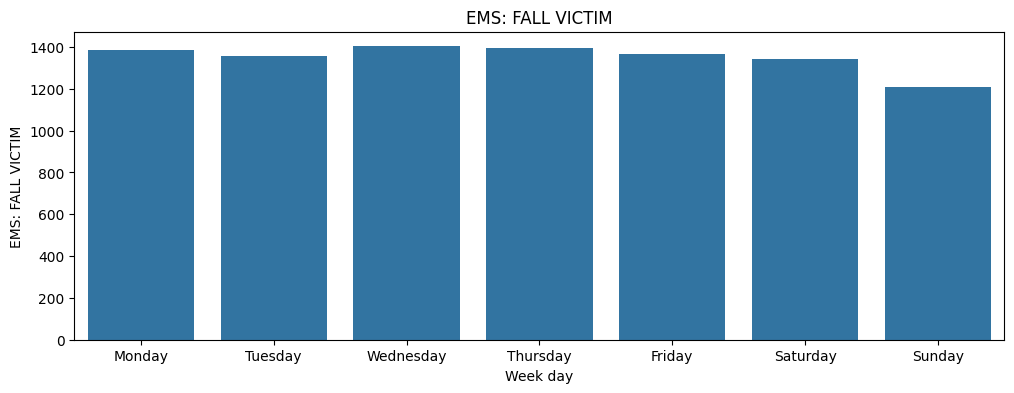

Number of calls with EMS: GENERAL WEAKNESS 2906


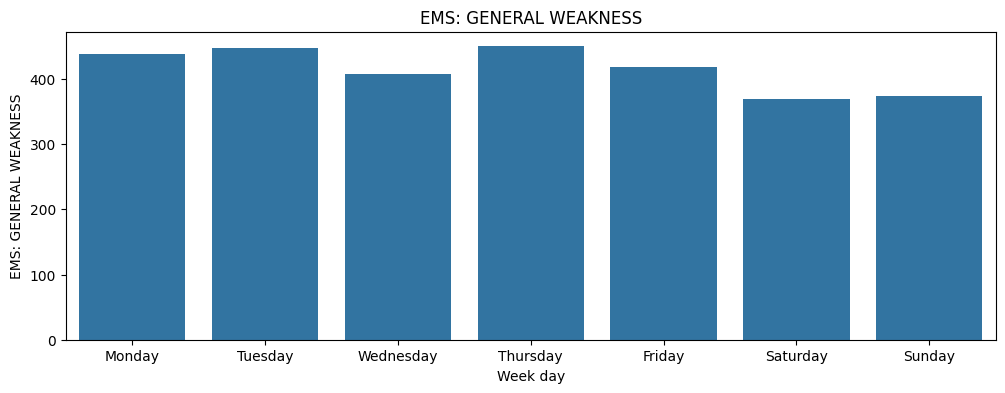

Number of calls with EMS: HEAD INJURY 4890


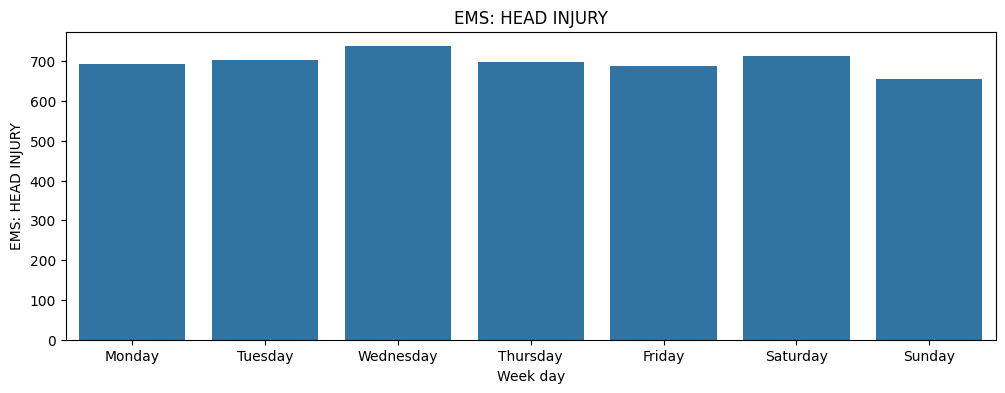

Number of calls with EMS: HEMORRHAGING 2411


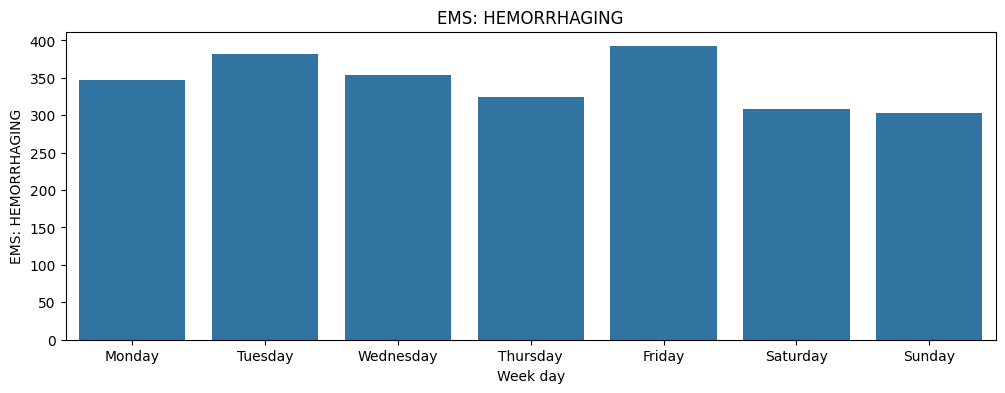

Number of calls with EMS: MEDICAL ALERT ALARM 2572


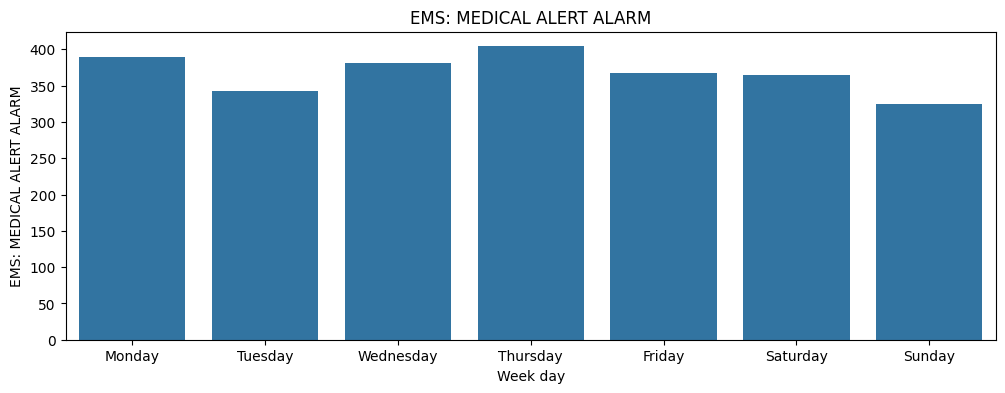

Number of calls with EMS: NAUSEA/VOMITING 2195


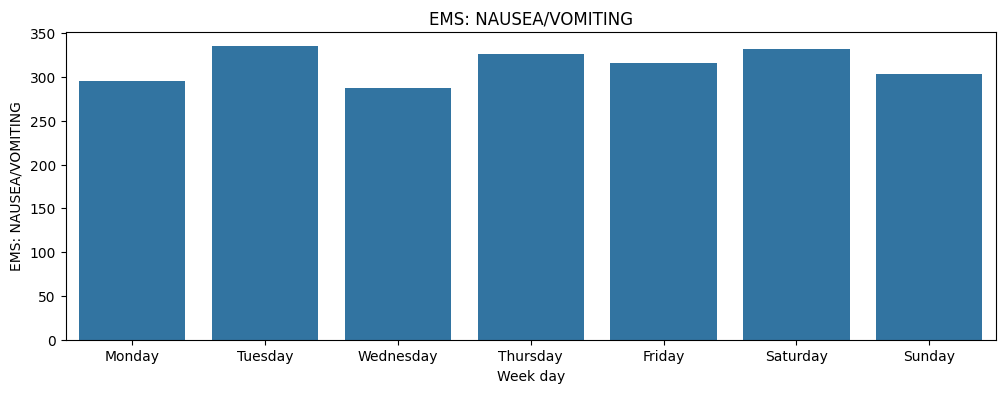

Number of calls with EMS: OVERDOSE 2387


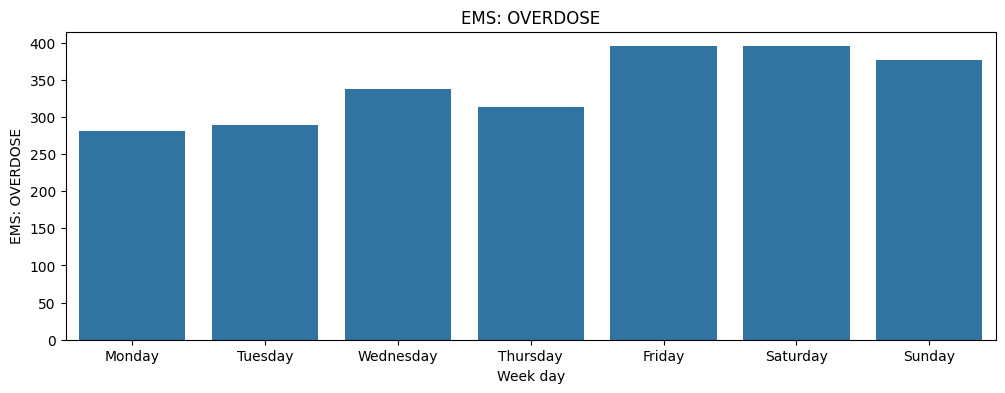

Number of calls with EMS: RESPIRATORY EMERGENCY 9824


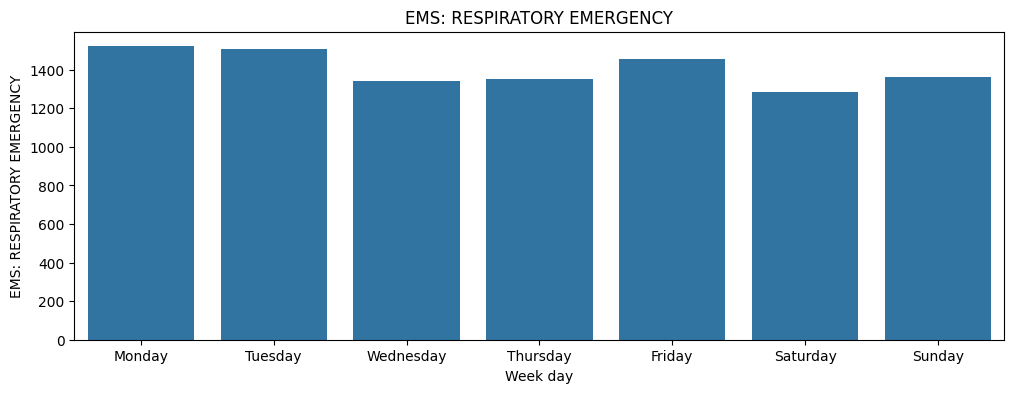

Number of calls with EMS: SEIZURES 3179


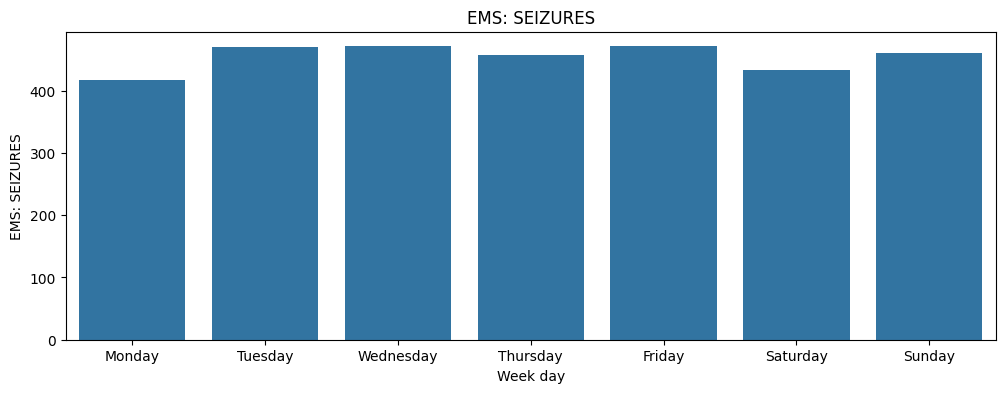

Number of calls with EMS: SUBJECT IN PAIN 5244


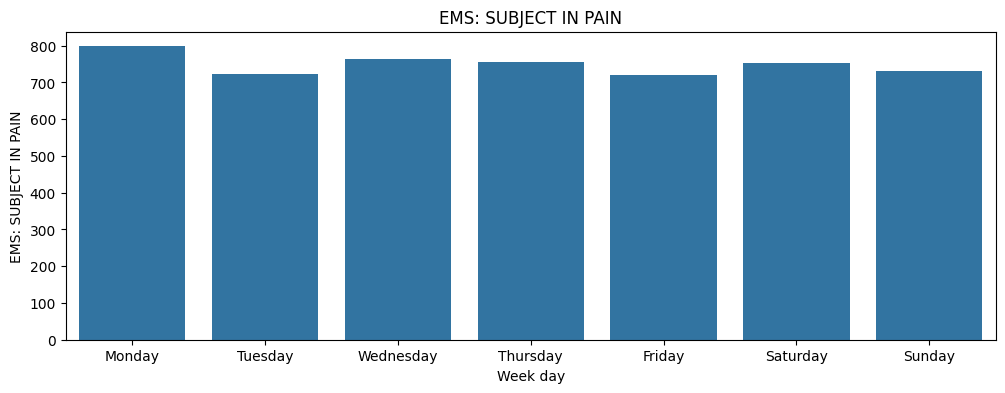

Number of calls with EMS: SYNCOPAL EPISODE 3312


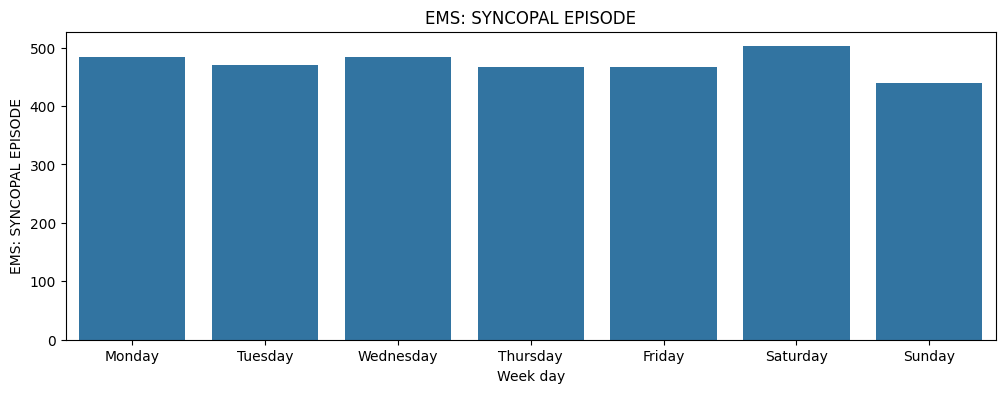

Number of calls with EMS: UNCONSCIOUS SUBJECT 2367


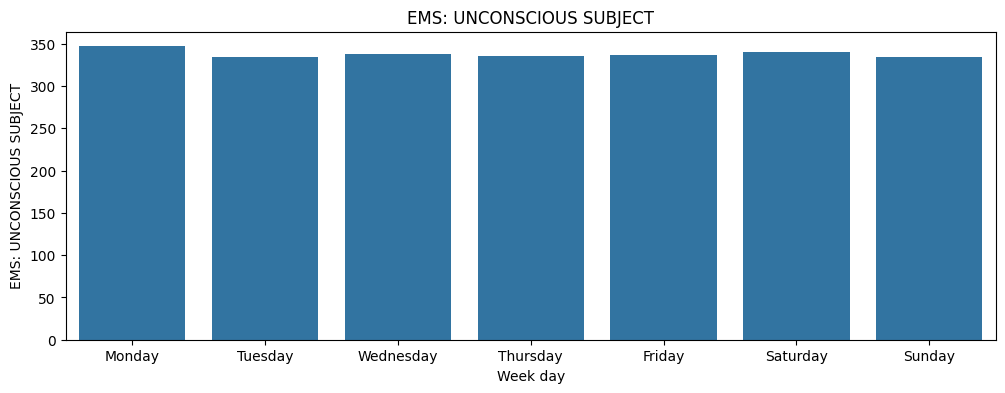

Number of calls with EMS: UNKNOWN MEDICAL EMERGENCY 3427


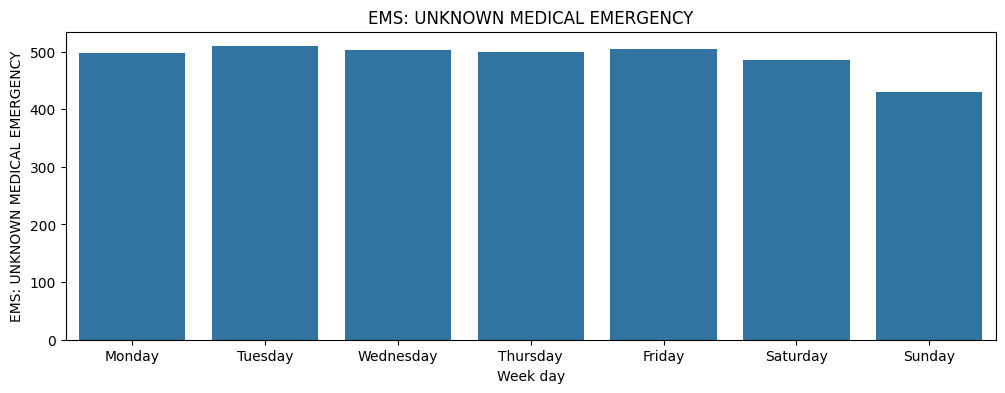

Number of calls with EMS: VEHICLE ACCIDENT 7502


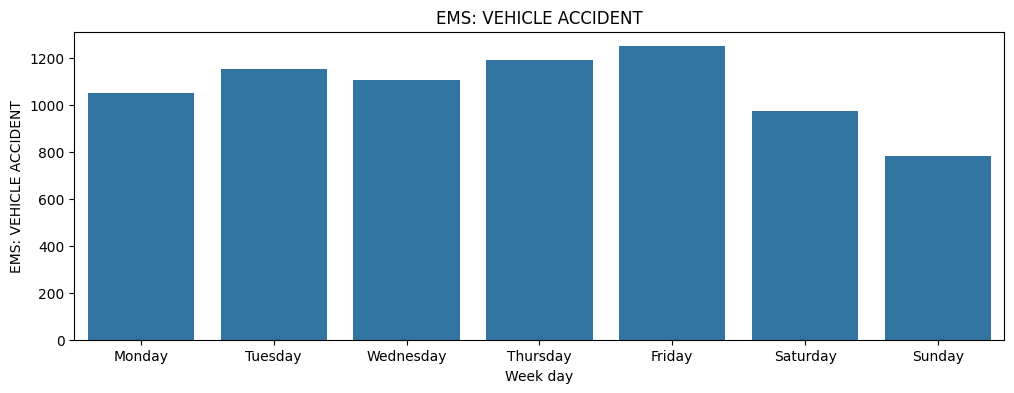

Number of calls with Fire: FIRE ALARM 10517


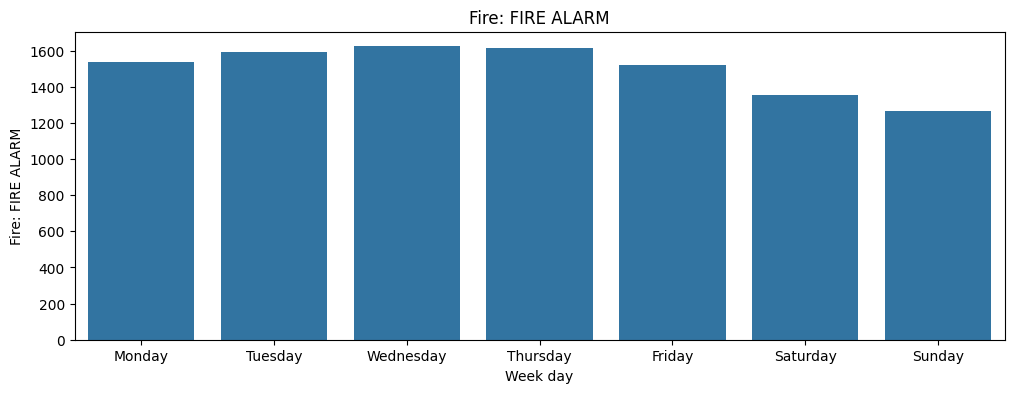

Number of calls with Fire: FIRE INVESTIGATION 2651


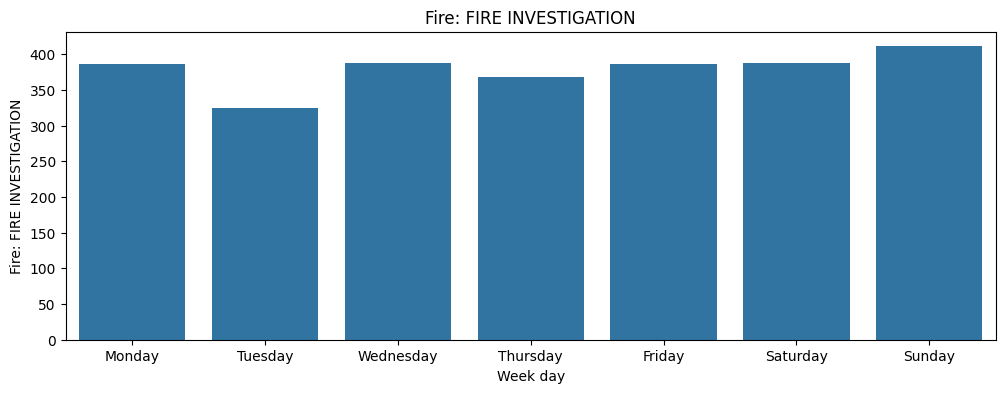

Number of calls with Fire: GAS-ODOR/LEAK 2008


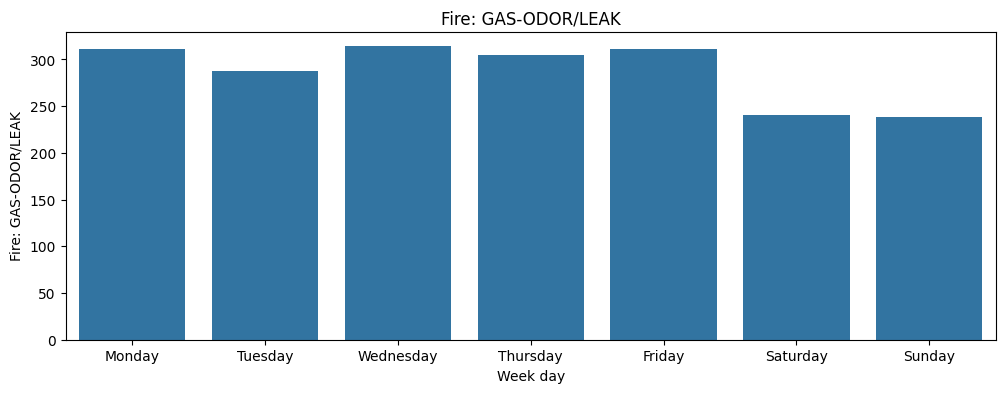

Number of calls with Fire: VEHICLE ACCIDENT 3164


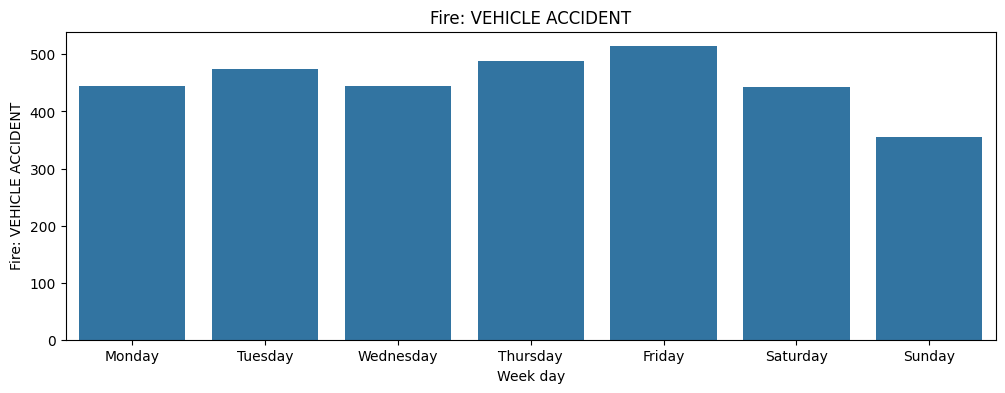

Number of calls with Traffic: DISABLED VEHICLE - 13719


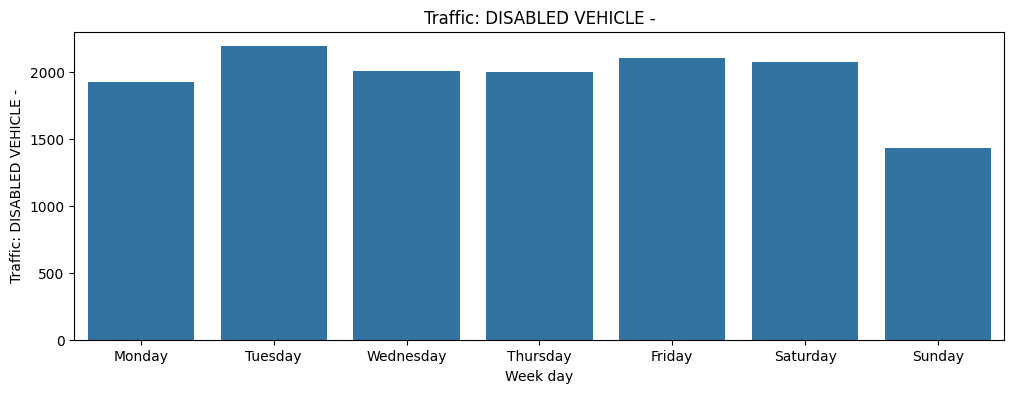

Number of calls with Traffic: HAZARDOUS ROAD CONDITIONS - 1833


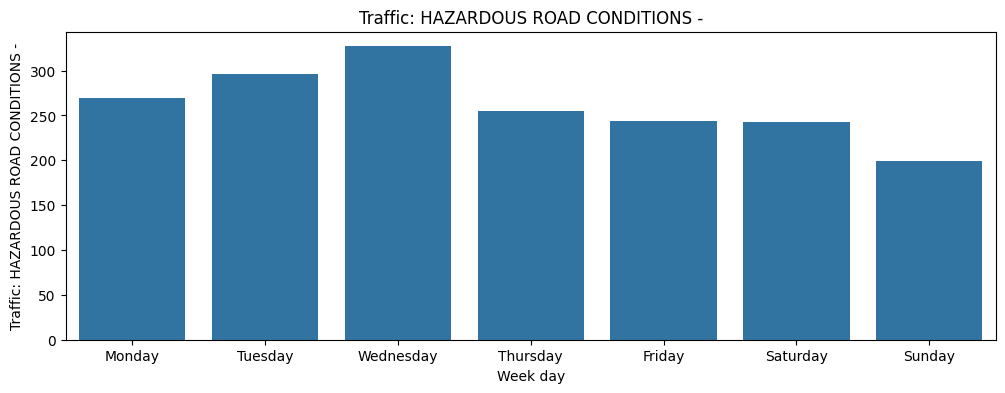

Number of calls with Traffic: ROAD OBSTRUCTION - 5731


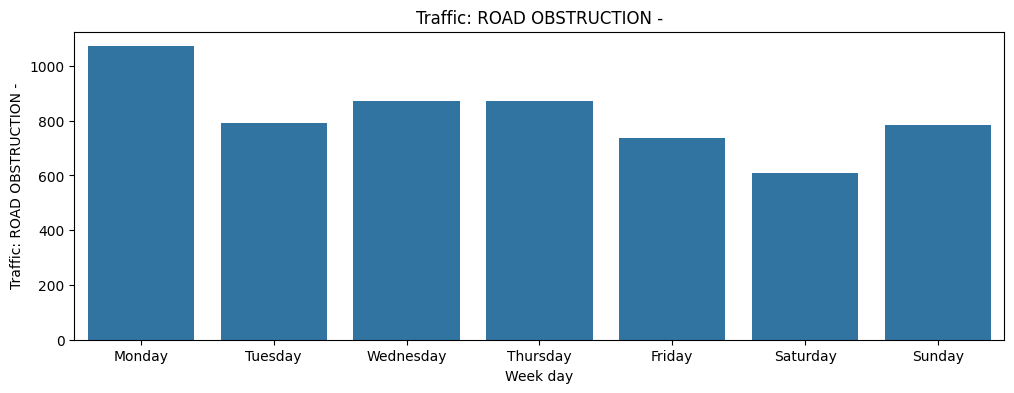

Number of calls with Traffic: VEHICLE ACCIDENT - 44100


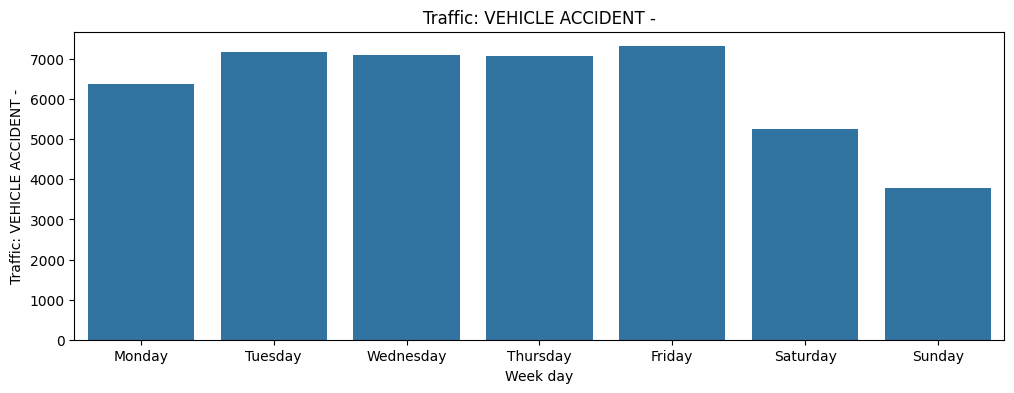

In [9]:
for i in range(reason.size):
    if new_data[i][:,3].size > 1700:
        plt.figure(figsize=(12,4))
        plt.title(new_data[i][0][-2])
        plt.xlabel("Week day")
        plt.ylabel(new_data[i][0][-2])
        print("Number of calls with " + new_data[i][0][-2] + " "+ str(new_data[i][:,3].size))
        sns.countplot(x=(new_data[i][:,0]),order = week)
        plt.show()  # Display the plot

On plots below you can see dependence between the reason of 911-call and time of the day.

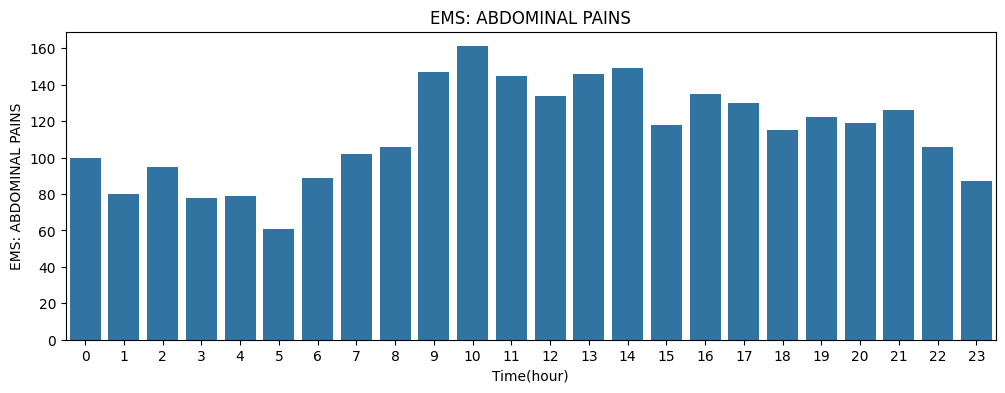

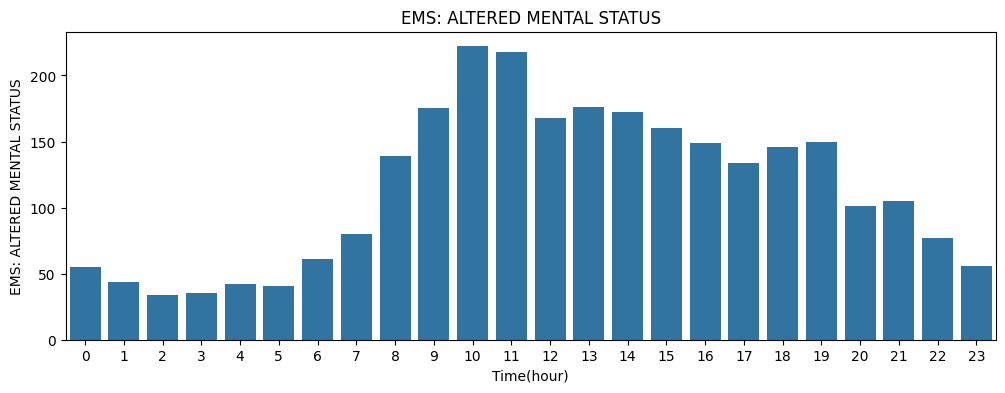

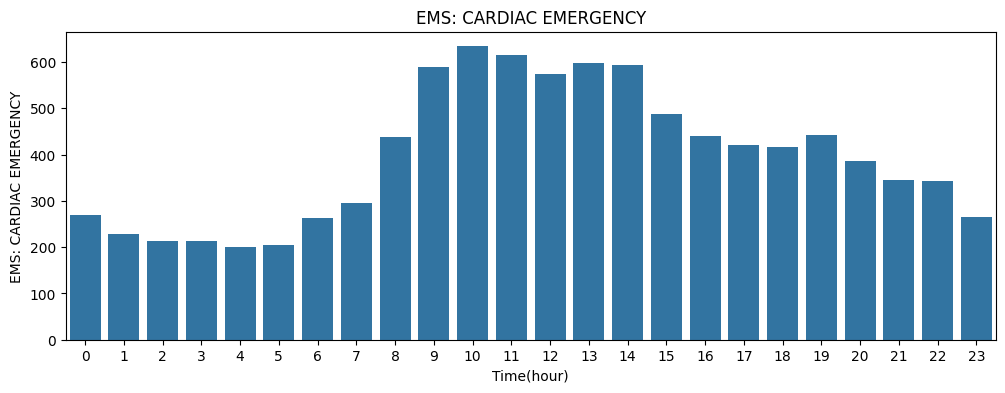

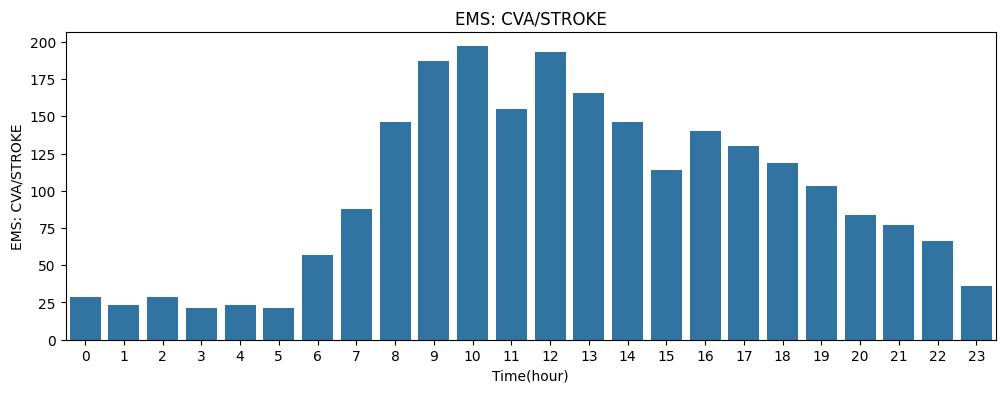

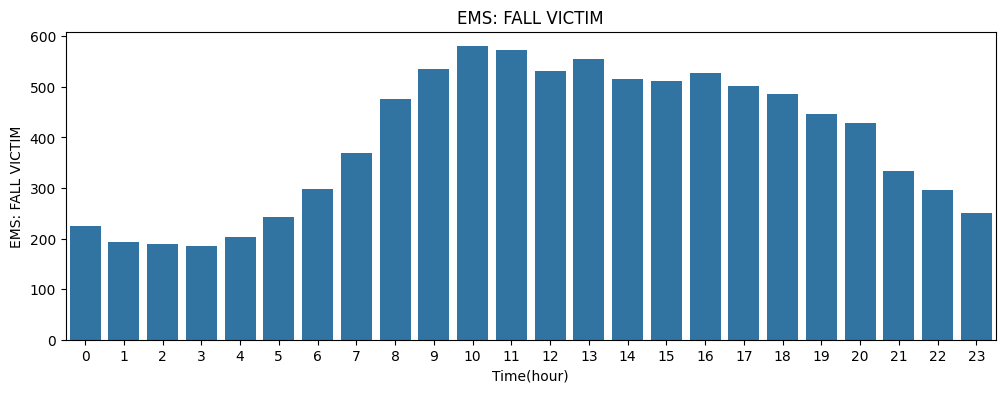

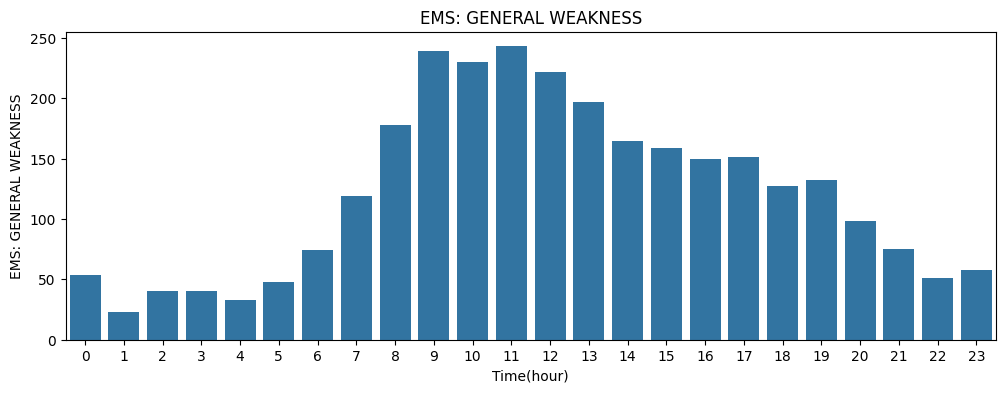

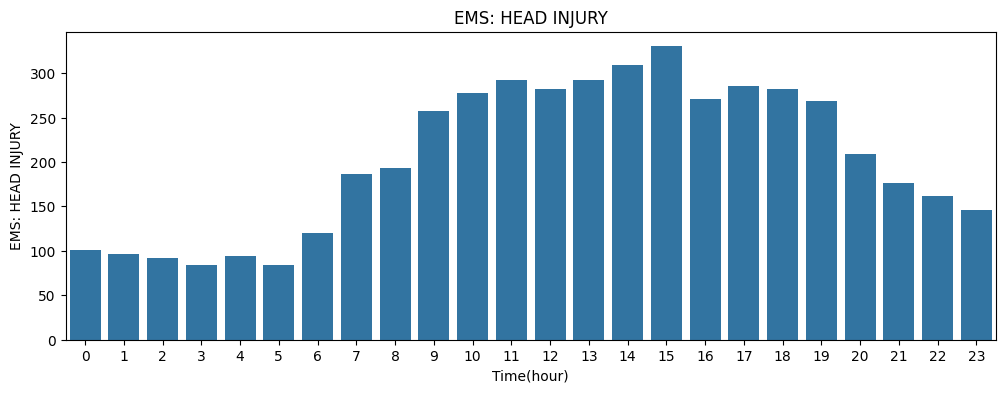

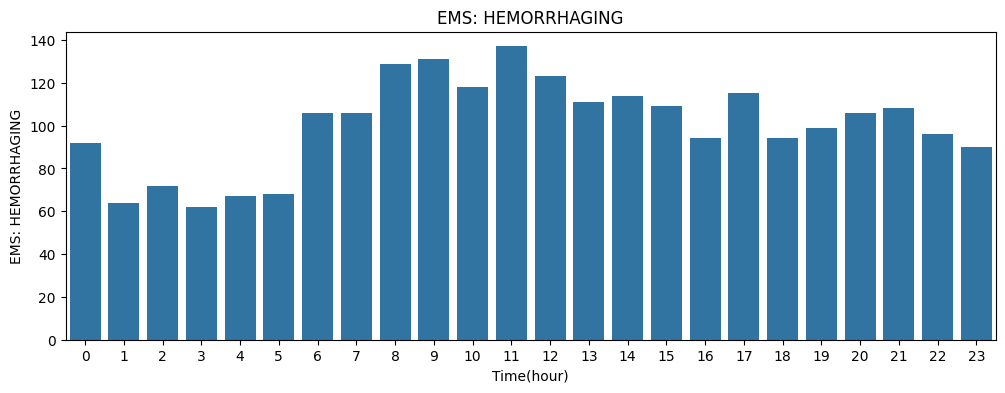

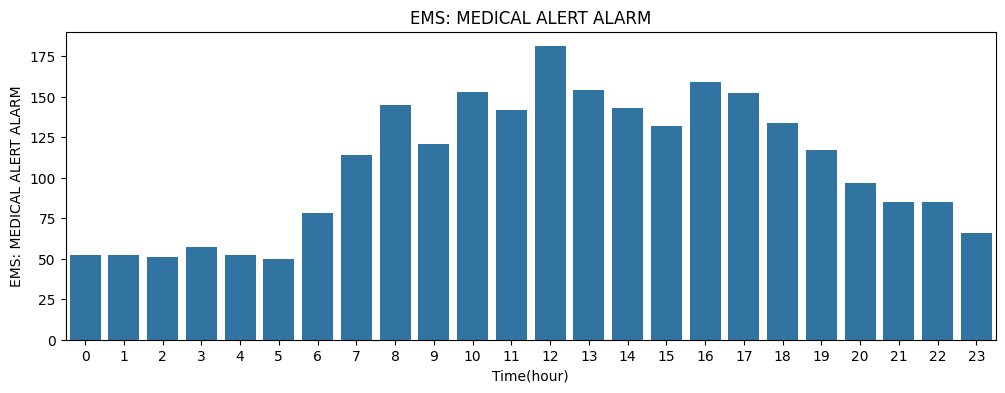

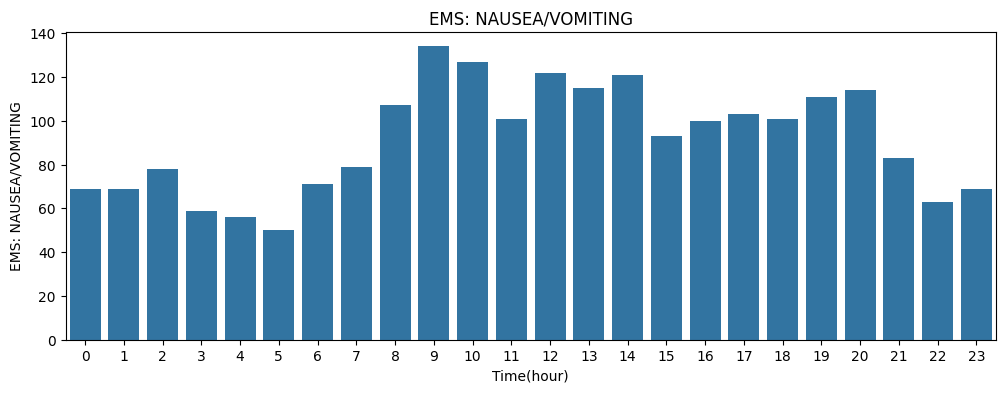

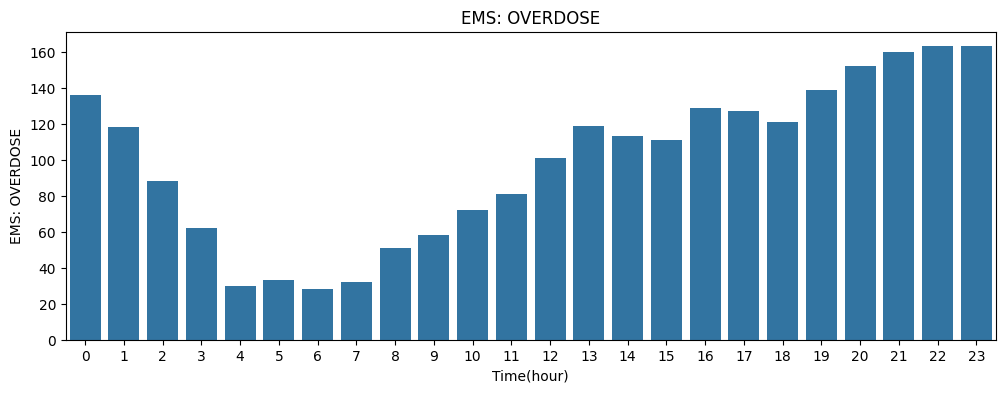

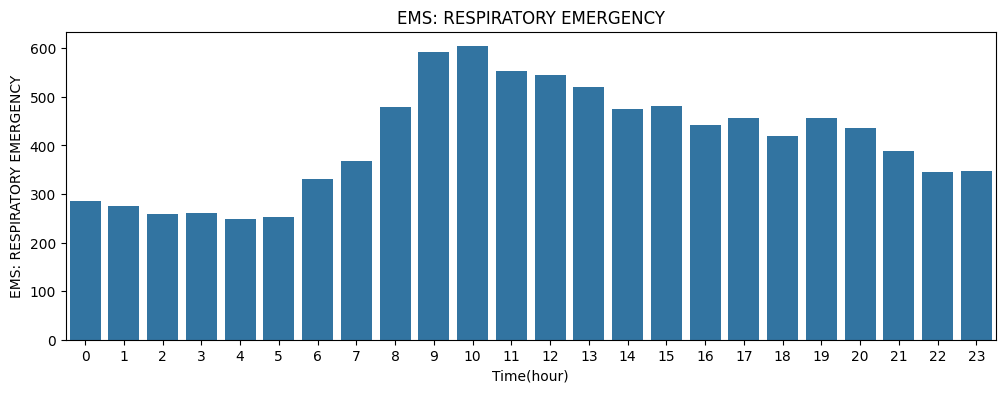

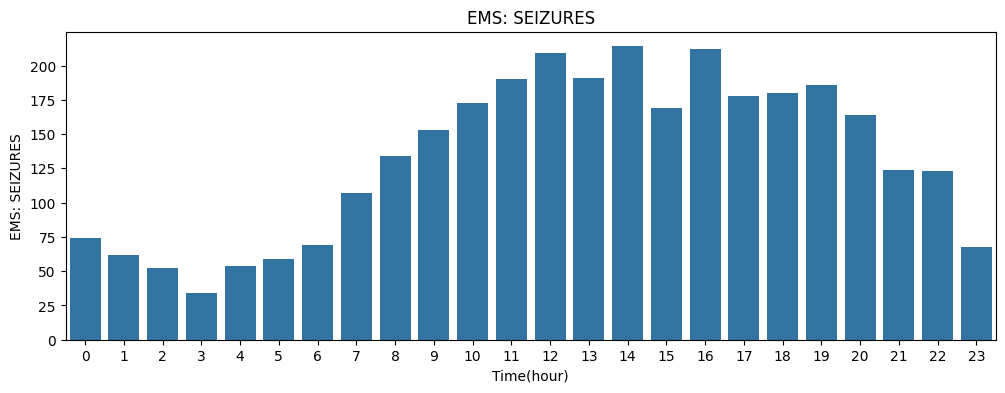

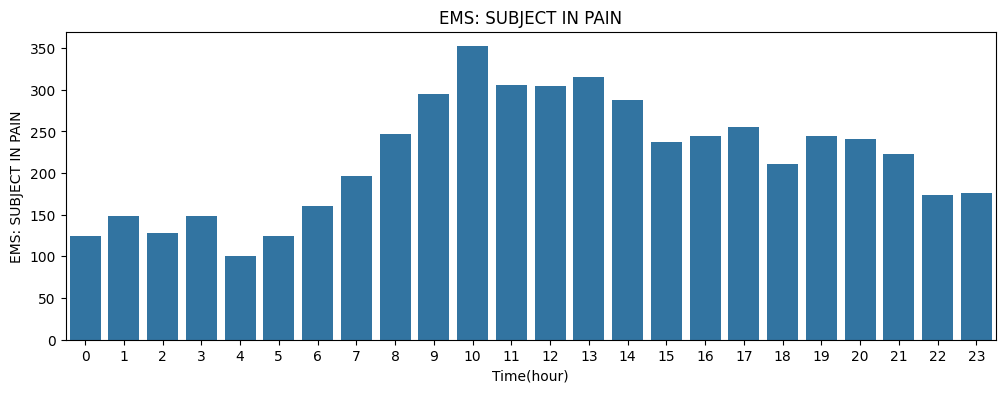

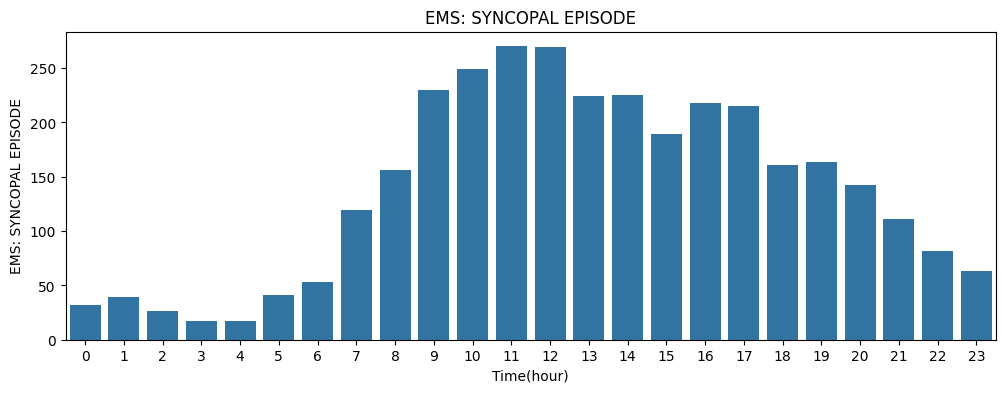

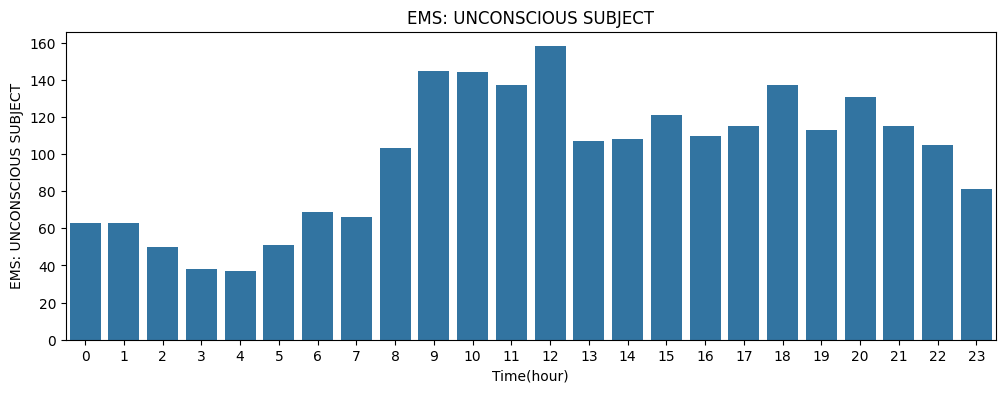

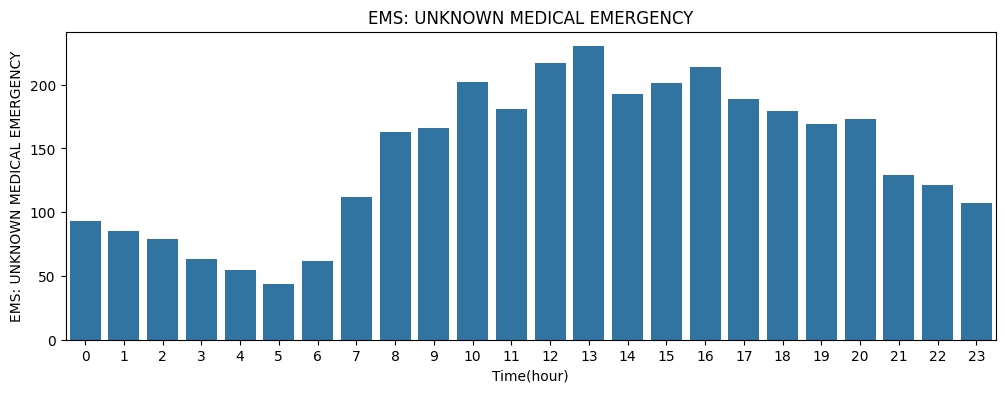

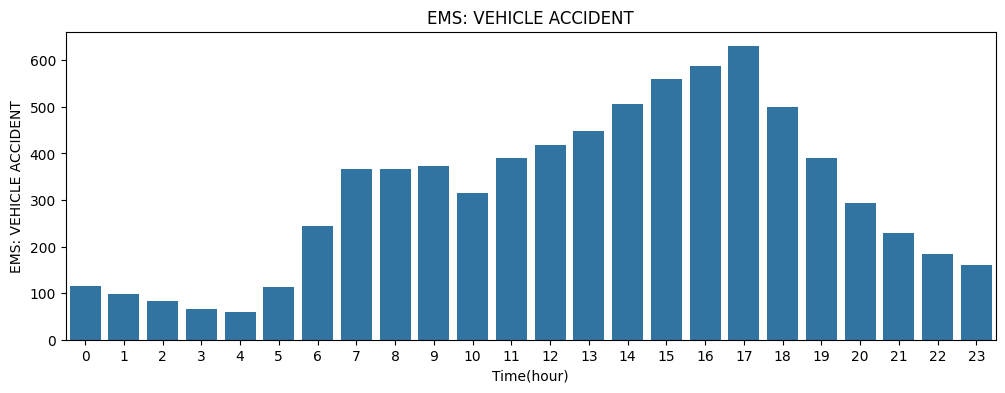

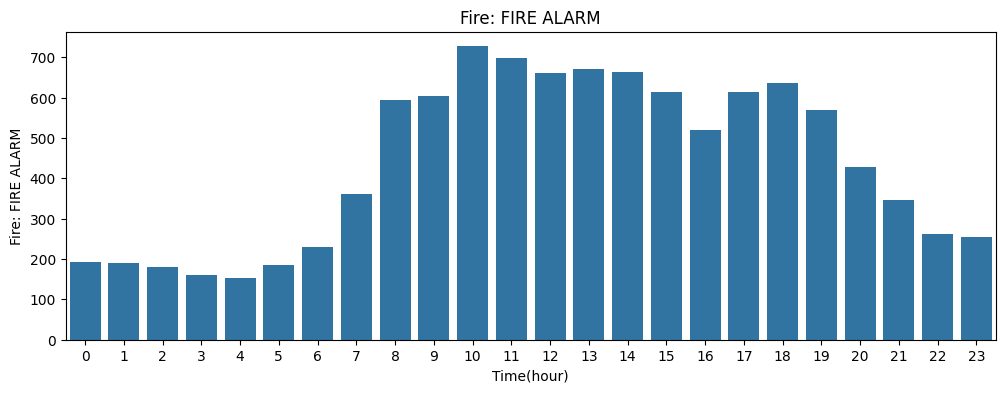

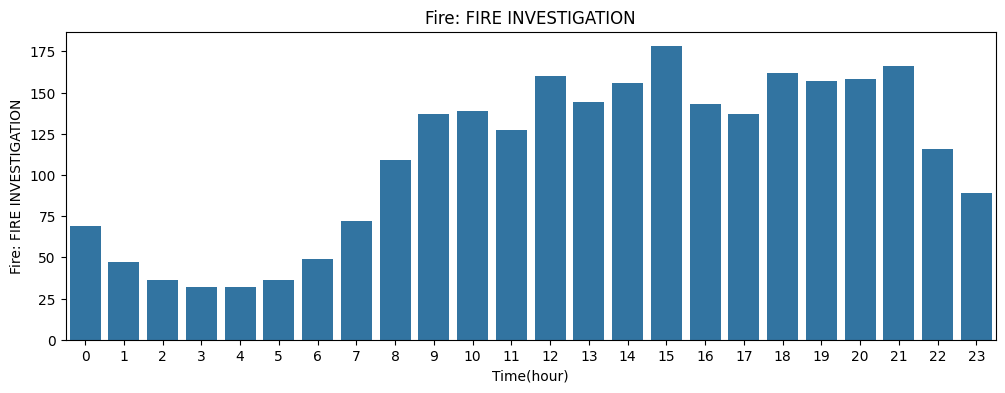

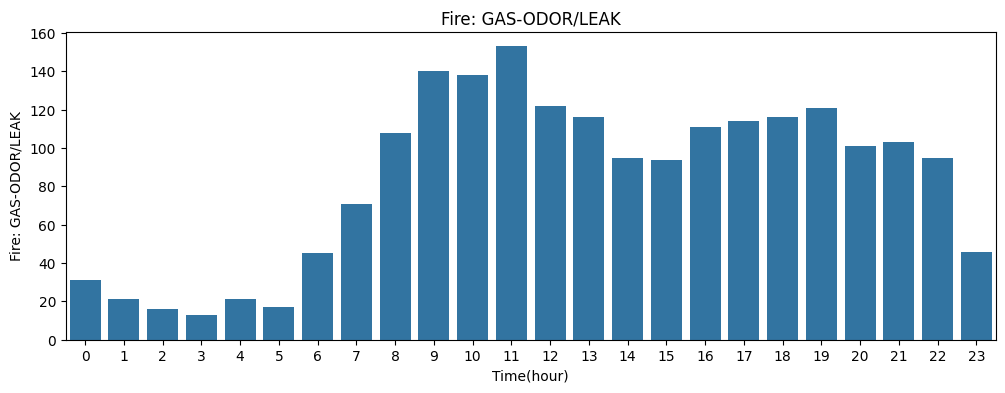

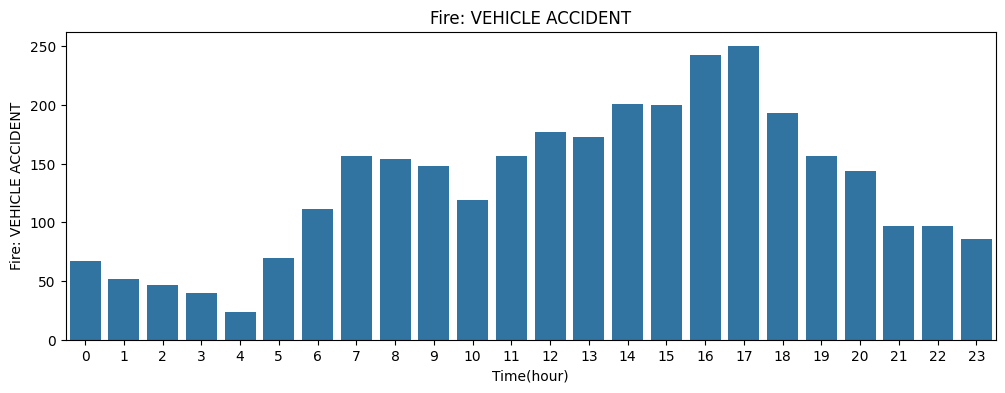

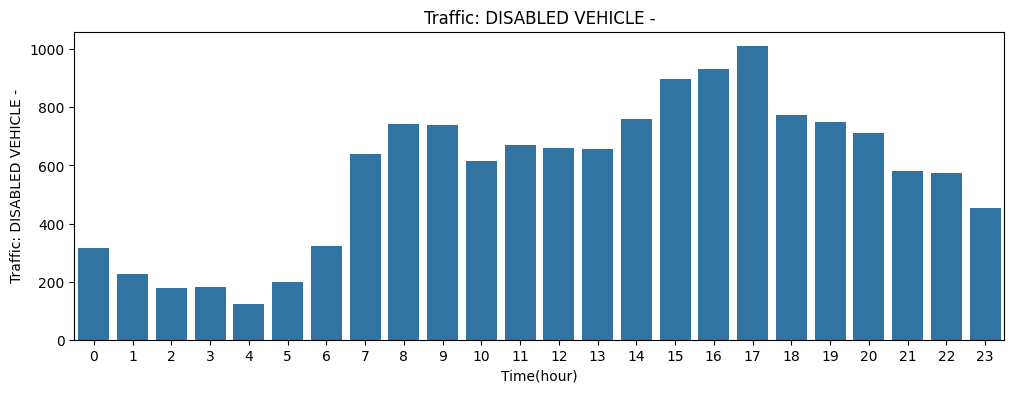

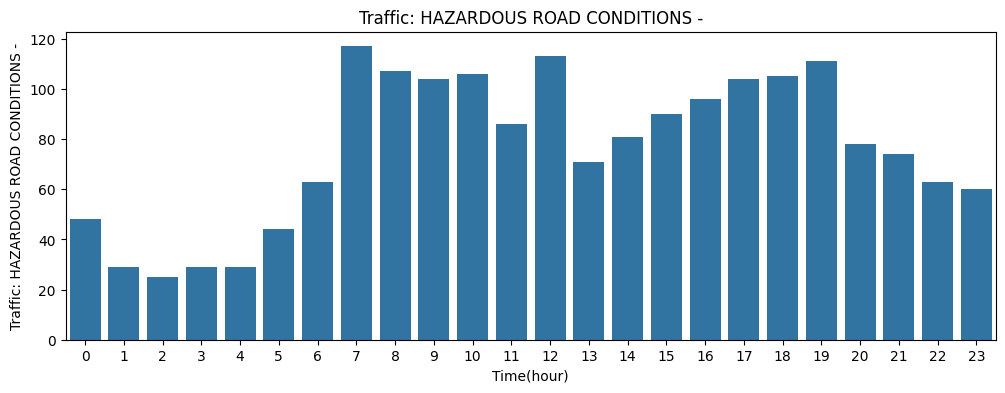

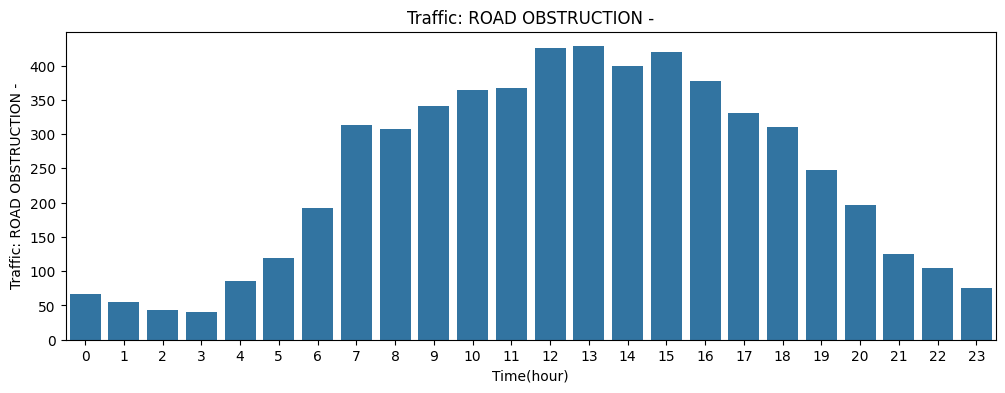

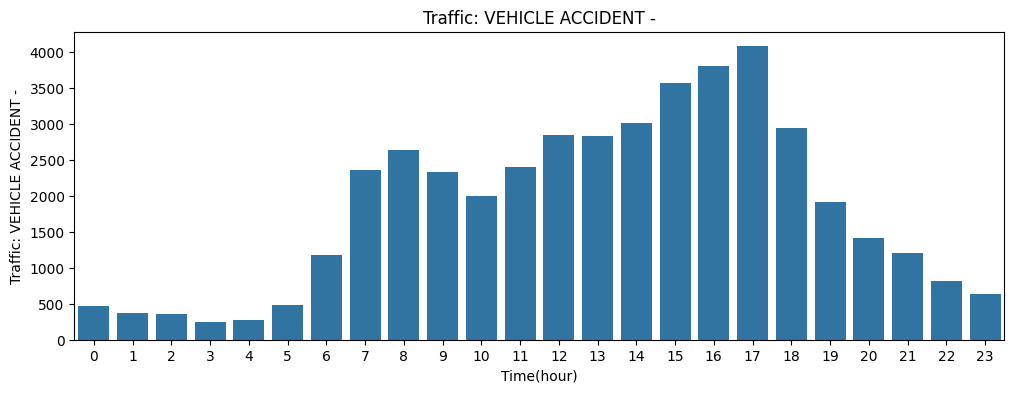

In [15]:
for i in range(reason.size):
    if new_data[i][:,3].size > 1700:
        plt.figure(figsize=(12,4))
        plt.title(new_data[i][0][-2])
        plt.xlabel("Time(hour)")
        plt.ylabel(new_data[i][0][-2])
        plt.xlim(0,24)
        sns.countplot(x=(new_data[i][:,3]).astype(int))
        plt.show()

In [11]:
for i in range(DATA.shape[0]):
    DATA[i,2] = DATA[i,2][:-3]

In [12]:
for i in range(reason.size):
    new_data[i] = DATA[np.where(DATA[:,4] == reason[i])]


On plots below you can see dependence between the reason of 911-call and month.

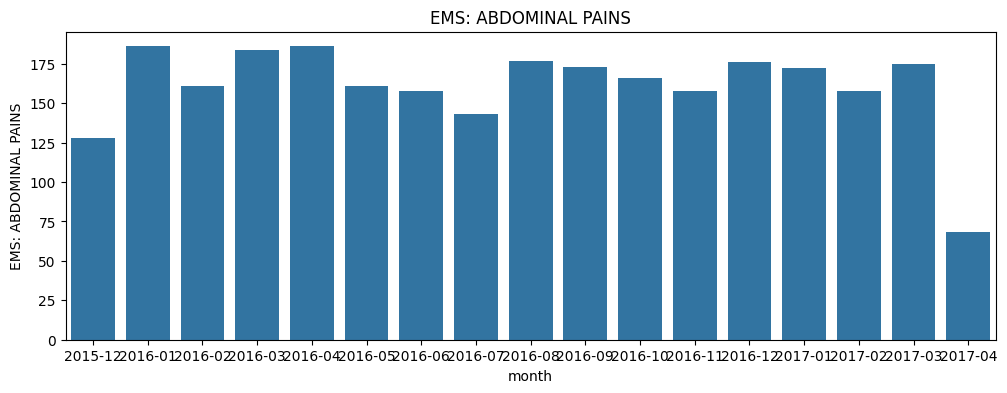

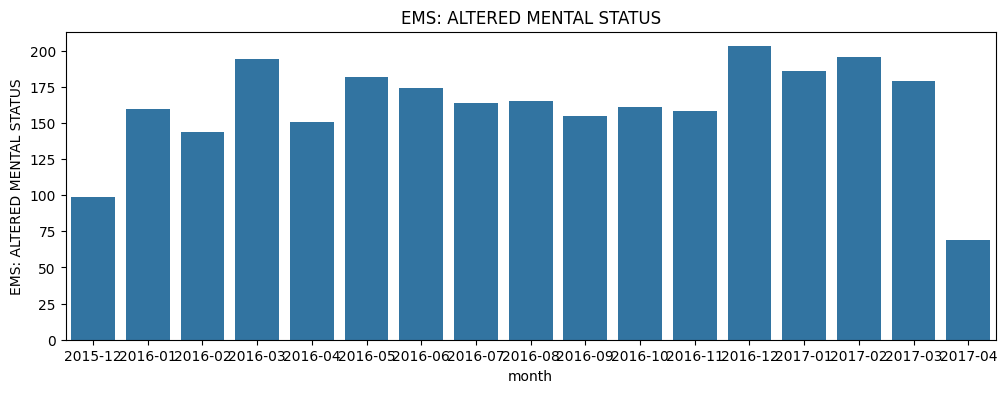

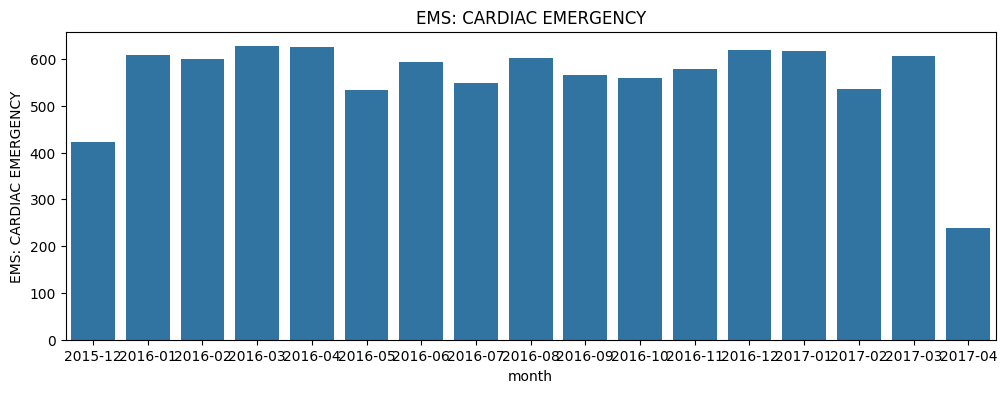

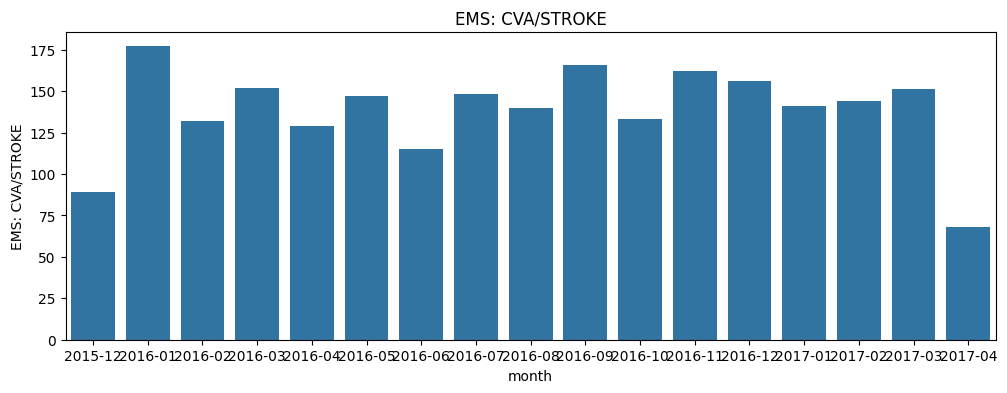

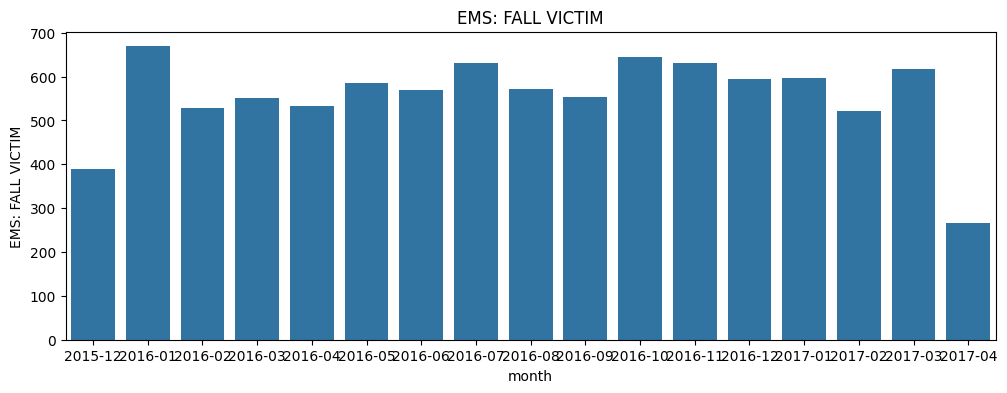

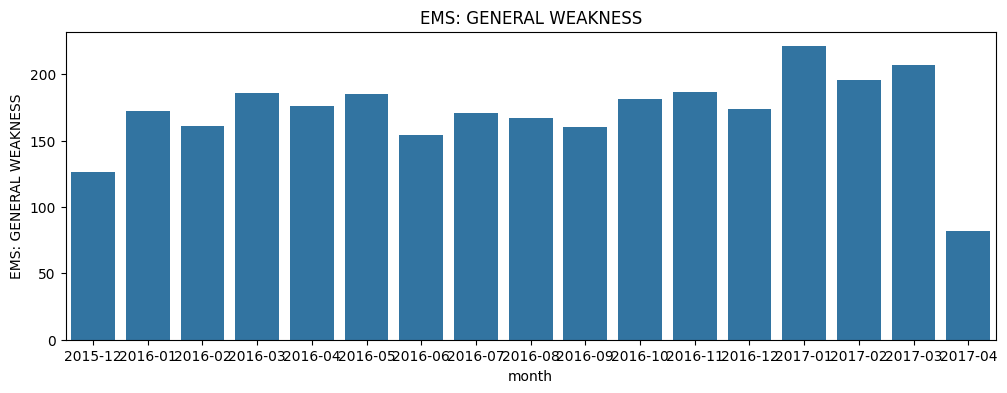

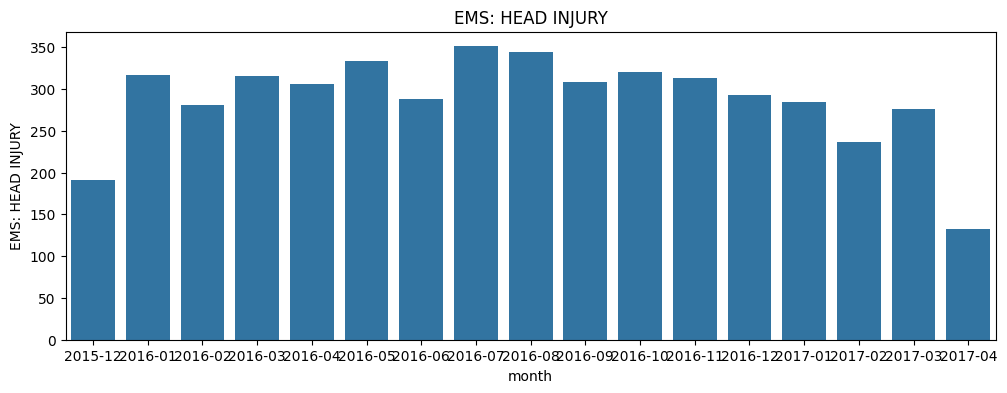

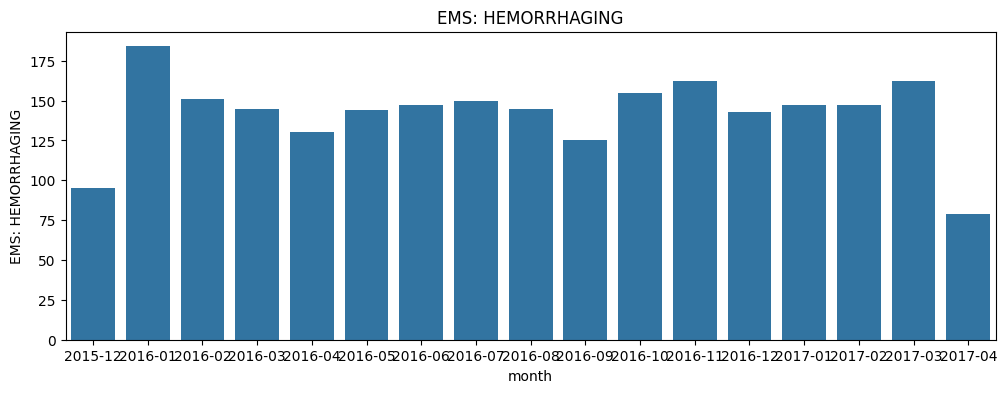

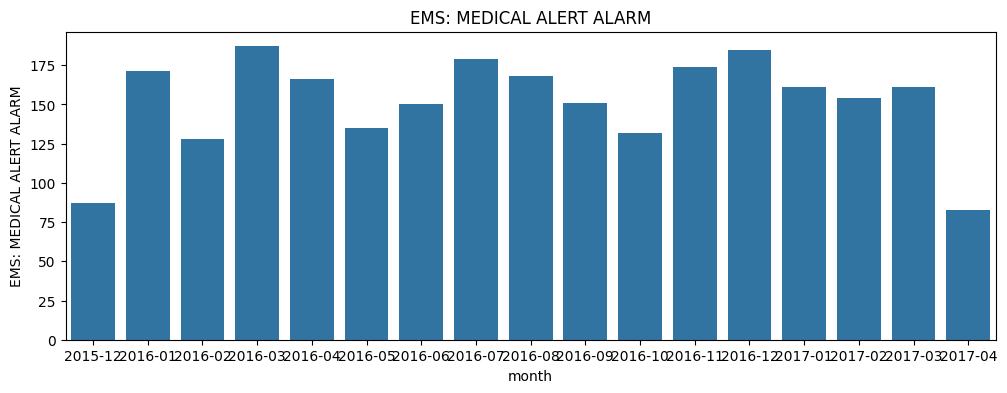

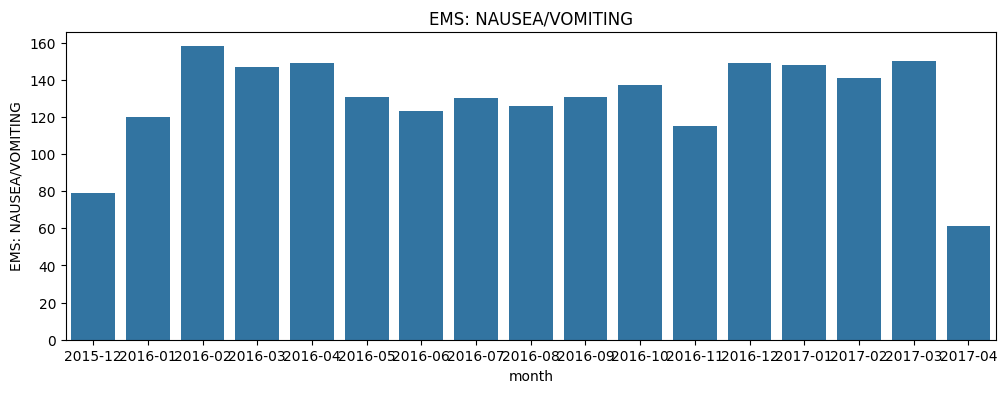

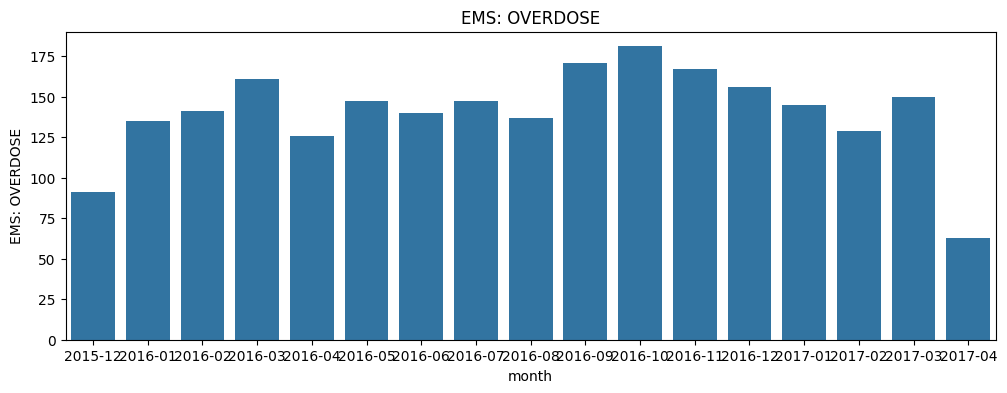

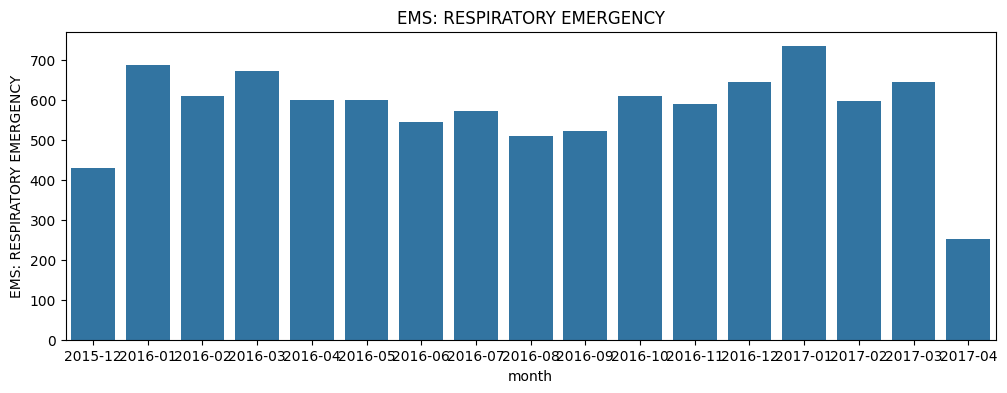

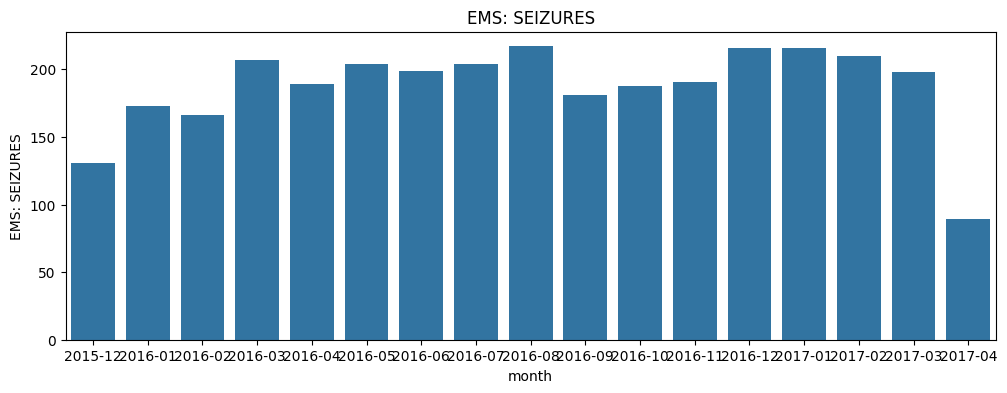

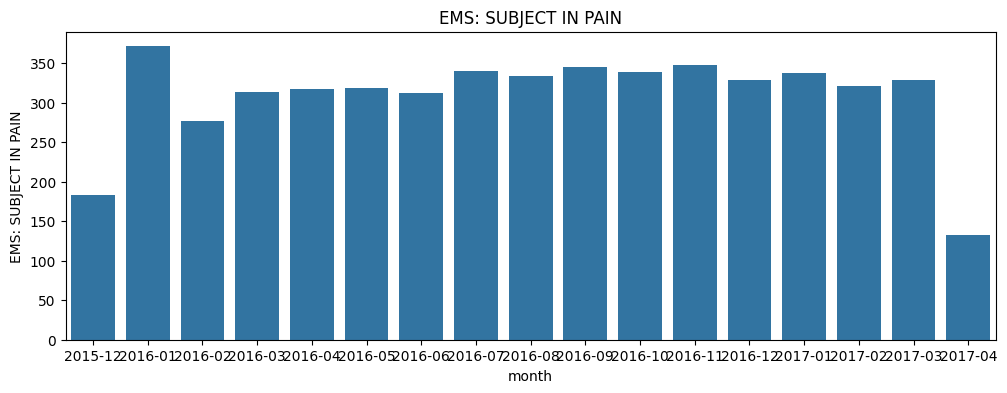

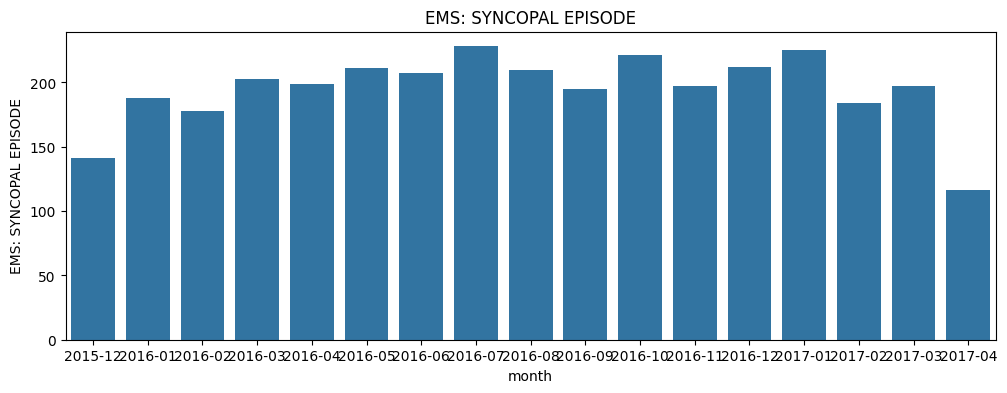

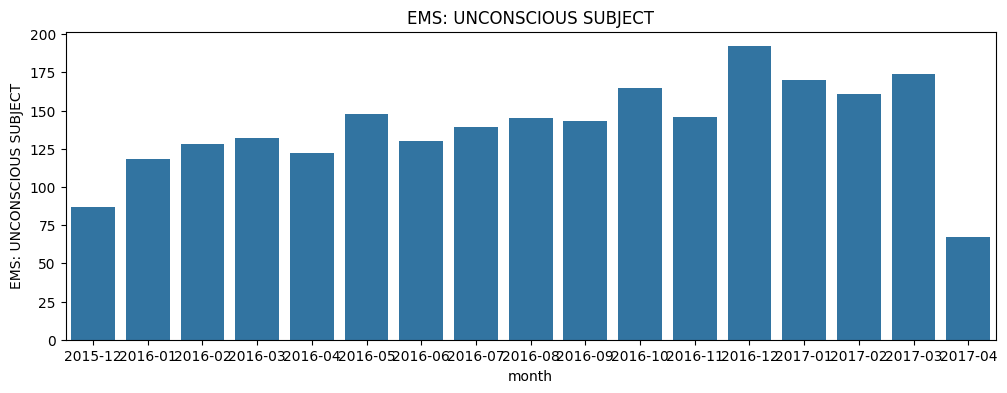

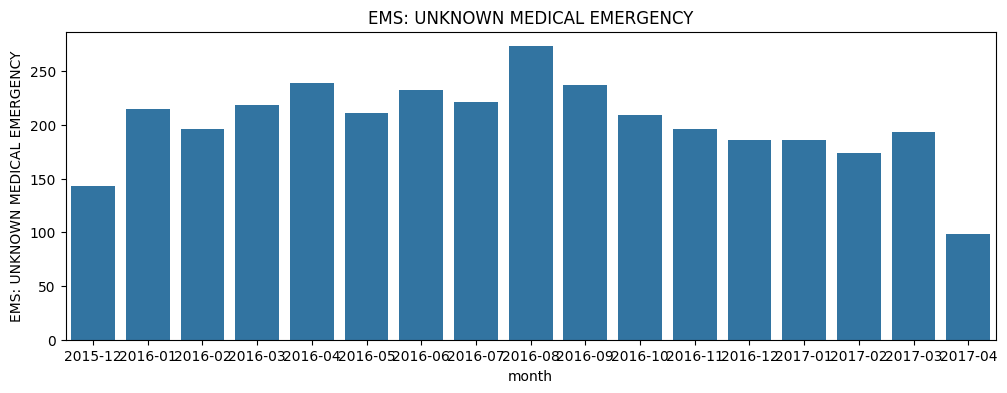

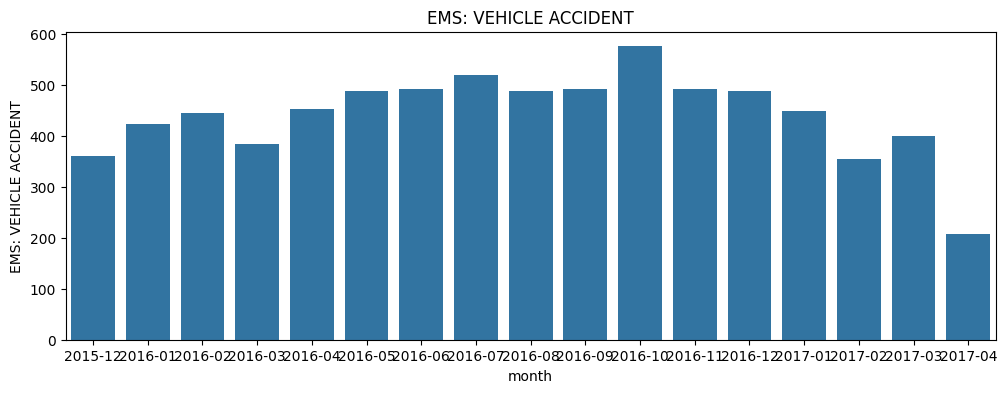

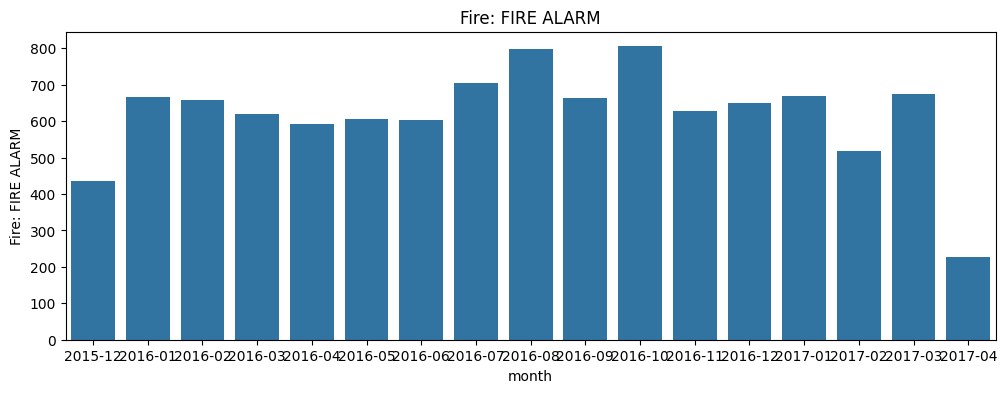

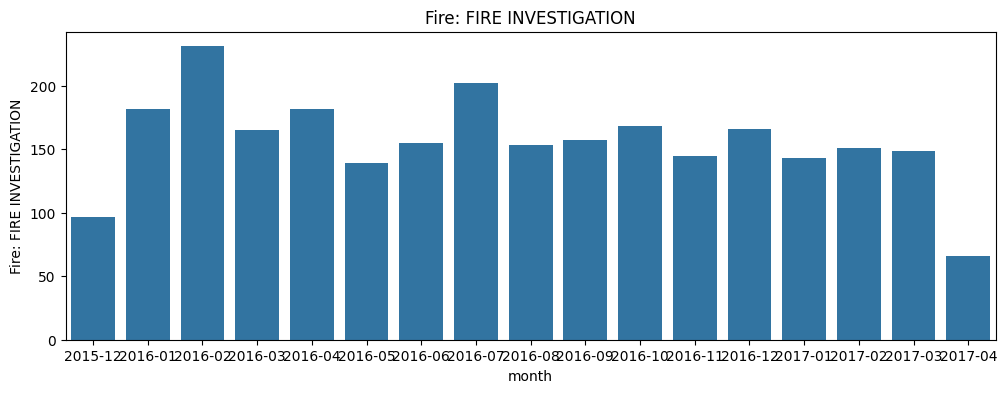

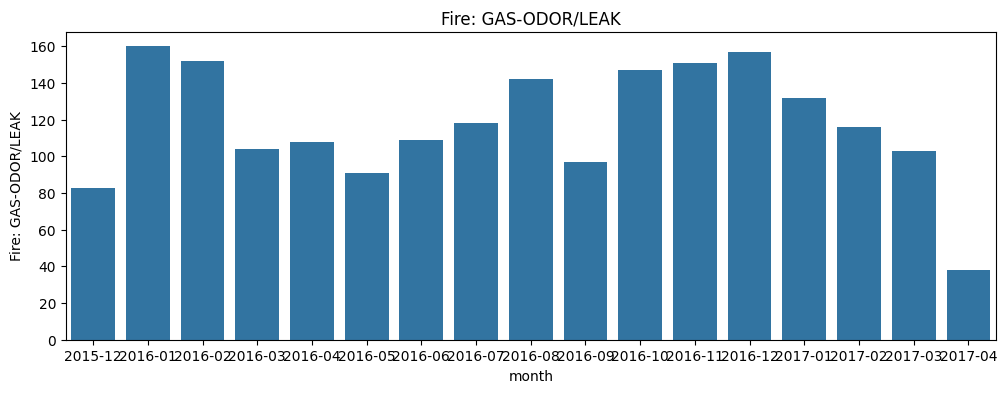

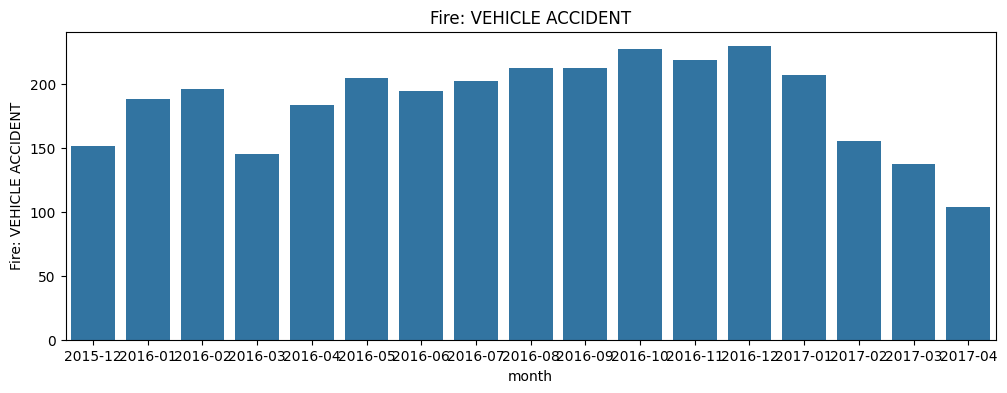

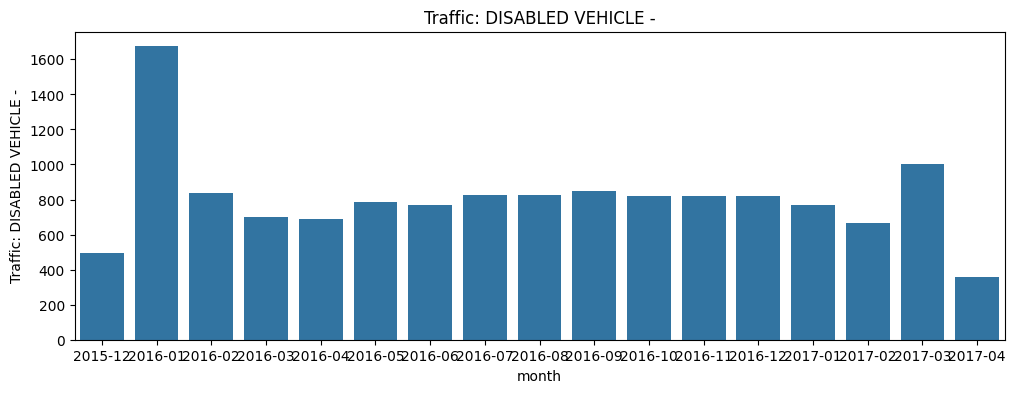

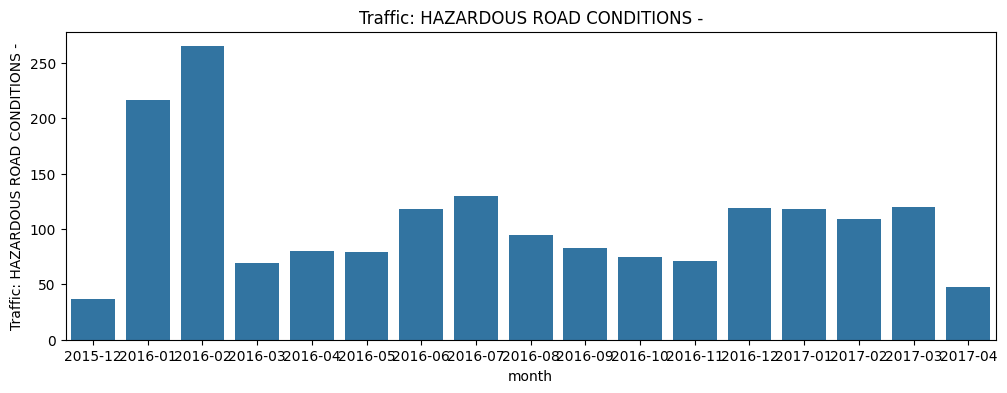

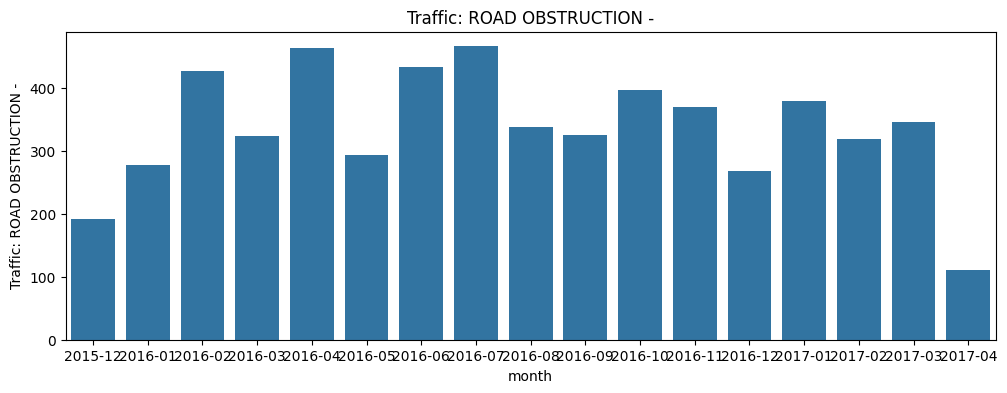

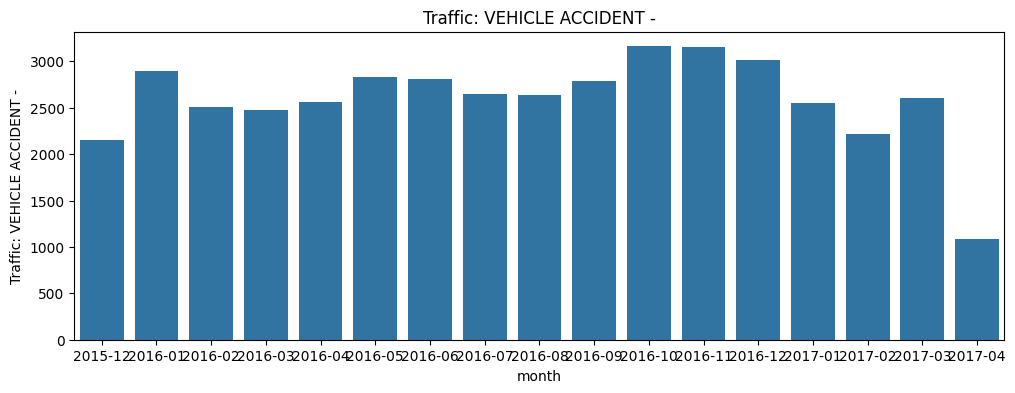

In [16]:
for i in range(reason.size):
    if new_data[i][:,2].size > 1700:
        plt.figure(figsize=(12,4))
        plt.title(new_data[i][0][-2])
        plt.xlabel("month")
        plt.ylabel(new_data[i][0][-2])
        sns.countplot(x=new_data[i][:,2])
        plt.show()

In [14]:
all_ = np.zeros(df["timeStamp"].values.size,dtype='O')
for i in range(all_.size):
    all_[i] = df['timeStamp'].values[i][:7]

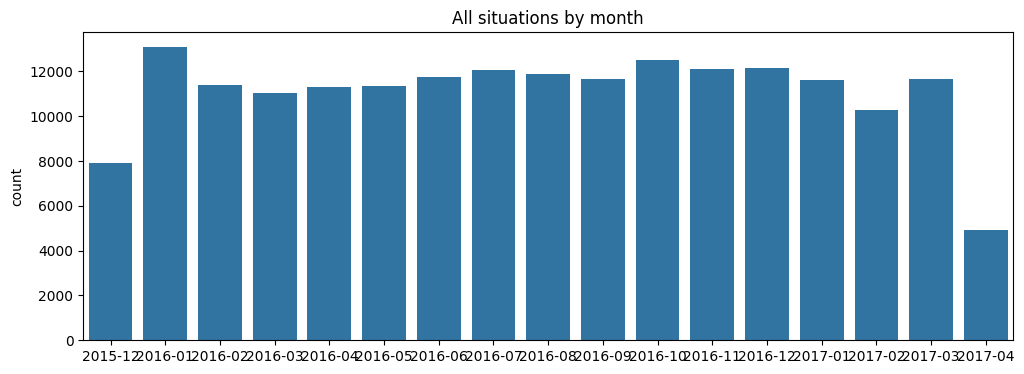

In [18]:
plt.figure(figsize=(12,4))
plt.title("All situations by month")
sns.countplot(x=all_)
plt.show()

In [19]:
all_ = np.zeros(df["timeStamp"].values.size,dtype='O')
for i in range(all_.size):
    all_[i] = df['timeStamp'].values[i][:10]

In [20]:
for i in range(all_.size):
    w = np.array(all_[i].split('-')).astype(int)
    all_[i] = week[calendar.weekday(w[0],w[1],w[2])]

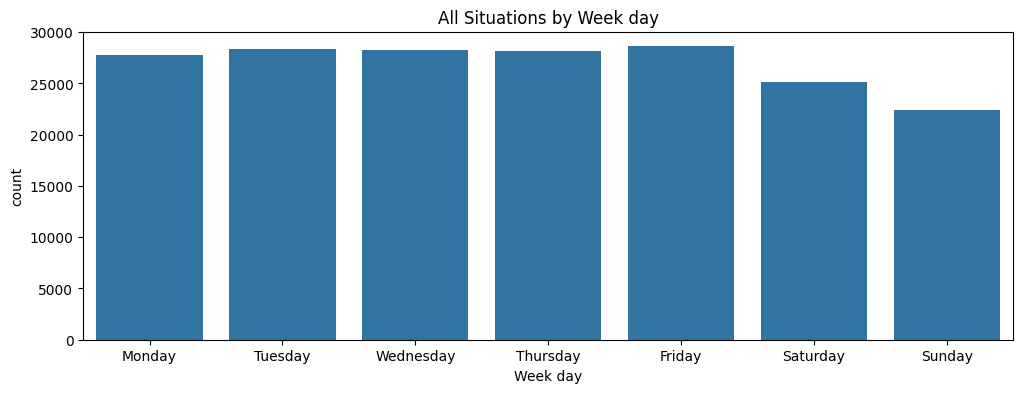

In [21]:
plt.figure(figsize=(12,4))
plt.xlabel("Week day")
plt.title("All Situations by Week day")
sns.countplot(x=all_,order = week)
plt.show()

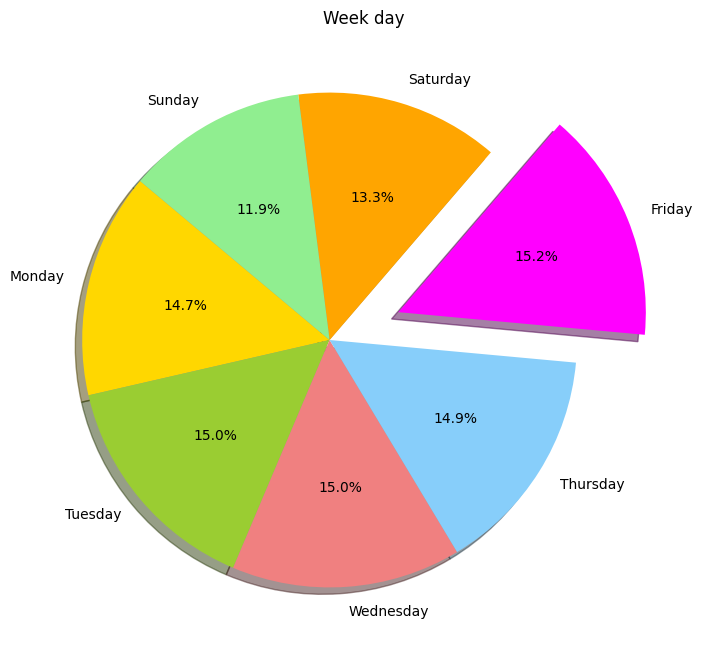

In [22]:
labels = "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
sizes = [np.sum(all_ == "Monday"),np.sum(all_ == "Tuesday"),np.sum(all_ == "Wednesday"),np.sum(all_ == "Thursday"),np.sum(all_ == "Friday"),\
         np.sum(all_ == "Saturday"),np.sum(all_ == "Sunday")]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','magenta','orange','lightgreen']
explode = (0, 0, 0, 0, 0.3, 0, 0)  # explode 1st slice
plt.figure(figsize=(8,8))
# Plot
plt.title('Week day')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [23]:
all_ = np.zeros(df["timeStamp"].values.size,dtype='O')
for i in range(all_.size):
    h = np.array(df['timeStamp'].values[i][11:].split(":")).astype(int)
    all_[i] = (h[0] * 3600 + h[1] * 60 + h[2])/3600